# 🏦 Banking Dataset - Complete Feature Guide for Beginners

## 📊 Dataset Overview
- **Total Records**: 54,712 customers
- **Total Features**: 19 columns
- **Target Variable**: Whether customer subscribed to term deposit (yes/no)

---

## 📋 Features Explained in Detail

### 🔢 **Index & Identifier Columns**

#### 1. **Unnamed: 0** (int64)
- **Type**: Index column
- **Description**: Auto-generated row number (0 to 54,711)
- **Example**: 0, 1, 2, 3, ...
- **Usage**: Not useful for modeling - should be dropped
- **Note**: This is typically created when exporting from Excel/CSV


#### 3. **age** (int64) ✅ NUMERIC
- **Type**: Numeric (continuous)
- **Why Important**: Different age groups have different financial needs and saving behaviors
- **Pattern**: Older customers might be more likely to subscribe to term deposits

#### 4. **job** (object) ✅ CATEGORICAL
- **Type**: Categorical (text)
- **Description**: Customer's occupation or employment type
- **Possible Values**:
  - `"admin."` → Administrative staff
  - `"blue-collar"` → Manual workers (factory, construction, etc.)
  - `"entrepreneur"` → Business owners
  - `"housemaid"` → Domestic workers
  - `"management"` → Managers, executives
  - `"retired"` → Retired individuals
  - `"self-employed"` → Freelancers, contractors
  - `"services"` → Service industry workers
  - `"student"` → Students
  - `"technician"` → Technical workers
  - `"unemployed"` → Currently unemployed
  - `"unknown"` → Job not known
- **Example**: If someone is "management", they likely have higher income
- **Why Important**: Job type correlates with income level and financial stability

#### 7. **balance** (float64) ⚠️ NUMERIC - HAS MISSING VALUES!
- **Type**: Numeric (continuous)
- **Description**: Average yearly balance in customer's account (in euros €)
- **Range**: Can be negative (overdraft) or positive
- **Non-Null Count**: Only 31,842 out of 54,712 (42% missing!)
- **Example**:
  - `-500` → Customer owes bank €500 (overdraft)
  - `0` → No money in account
  - `5000` → Customer has €5,000 saved
  - `50000` → Wealthy customer with €50,000
- **Why Important**: Shows customer's financial health and ability to invest
- **Note**: Negative balance means customer is in debt to the bank
- **Missing Data**: Need to handle missing values (imputation or indicator variable)

#### 8. **default** (object) ✅ CATEGORICAL
- **Type**: Binary categorical (yes/no)
- **Description**: Has the customer defaulted on credit before?
- **Possible Values**:
  - `"yes"` → Customer failed to repay a loan before (high risk)
  - `"no"` → Customer has clean credit history (low risk)
- **Example**: "yes" means customer didn't pay back a previous loan
- **Why Important**: Shows credit risk - banks avoid customers who don't repay
- **Pattern**: Customers with "no" default are more likely to be trusted with term deposits

#### 9. **housing** (object) ✅ CATEGORICAL
- **Type**: Binary categorical (yes/no)
- **Description**: Does customer have a housing loan (mortgage)?
- **Possible Values**:
  - `"yes"` → Customer is paying off a home loan
  - `"no"` → Customer has no mortgage
- **Example**: "yes" means customer is making monthly mortgage payments
- **Why Important**: Housing loan means monthly financial commitment
- **Pattern**: Customers with housing loans might have less money for term deposits

#### 10. **loan** (object) ✅ CATEGORICAL
- **Type**: Binary categorical (yes/no)
- **Description**: Does customer have any personal loans?
- **Possible Values**:
  - `"yes"` → Customer has personal loan(s) (car, education, etc.)
  - `"no"` → Customer has no personal loans
- **Example**: "yes" could be a car loan or student loan
- **Why Important**: Personal loans indicate existing debt obligations
- **Pattern**: Customers with loans might be less likely to invest in term deposits

---

### 📞 **Contact Information** (How bank contacted customer)

#### 11. **contact** (object) ✅ CATEGORICAL
- **Type**: Categorical (text)
- **Description**: Type of communication method used to contact customer
- **Possible Values**:
  - `"cellular"` → Mobile phone call
  - `"telephone"` → Landline/fixed phone call
  - `"unknown"` → Contact method not recorded
- **Example**: "cellular" means bank called customer's mobile phone
- **Why Important**: Contact method can affect response rate
- **Pattern**: Mobile phone contacts might have better success rates

#### 12. **day** (object) ✅ CATEGORICAL/NUMERIC
- **Type**: Categorical (stored as text, but represents numbers)
- **Description**: Day of the month when customer was last contacted
- **Range**: 1 to 31 (depending on month)
- **Example**: "15" means contacted on the 15th day of the month
- **Why Important**: Time of month might affect customer availability/willingness
- **Note**: Should be converted to numeric (int) for modeling

#### 13. **month** (object) ✅ CATEGORICAL
- **Type**: Categorical (text)
- **Description**: Month when customer was last contacted
- **Possible Values**:
  - `"jan"`, `"feb"`, `"mar"`, `"apr"`, `"may"`, `"jun"`
  - `"jul"`, `"aug"`, `"sep"`, `"oct"`, `"nov"`, `"dec"`
- **Example**: "may" means customer was contacted in May
- **Why Important**: Seasonal patterns in banking behavior
- **Pattern**: Some months (like December - bonus season) might have better conversion

#### 14. **duration** (int64) ✅ NUMERIC - VERY IMPORTANT!
- **Type**: Numeric (continuous)
- **Description**: How long the last phone call lasted (in seconds)
- **Range**: 0 to several thousand seconds
- **Example**:
  - `30` → Very short call (30 seconds) - customer hung up quickly
  - `180` → 3-minute conversation
  - `600` → 10-minute detailed discussion
- **Why Important**: **STRONGEST PREDICTOR!** Longer calls usually mean more interest
- **Pattern**: If duration > 300 seconds, very likely to subscribe
- **⚠️ Warning**: This feature is known AFTER the call, so it cannot be used for prediction before calling!


#### 15. **campaign** (int64) ✅ NUMERIC
- **Type**: Numeric (discrete/count)
- **Description**: Number of times customer was contacted during THIS campaign
- **Range**: 1 to 50+ (some customers contacted many times)
- **Example**:
  - `1` → First time contacting customer
  - `5` → Customer was called 5 times
  - `20` → Customer was persistently contacted 20 times
- **Why Important**: Shows marketing intensity
- **Pattern**: Too many contacts might annoy customers (diminishing returns)

#### 16. **pdays** (int64) ✅ NUMERIC - SPECIAL VALUES
- **Type**: Numeric (discrete)
- **Description**: Number of days since customer was last contacted in PREVIOUS campaign
- **Range**: -1 or 0 to 999
- **Special Value**: `-1` means customer was NEVER contacted before
- **Example**:
  - `-1` → Brand new customer, never contacted before
  - `7` → Contacted 7 days ago in previous campaign
  - `180` → Contacted 6 months ago
  - `999` → Contacted more than 999 days ago (very old contact)
- **Why Important**: Recent previous contact might influence success
- **Pattern**: Customers never contacted before (-1) might react differently

#### 17. **previous** (int64) ✅ NUMERIC
- **Type**: Numeric (discrete/count)
- **Description**: Number of contacts made to customer BEFORE this campaign
- **Range**: 0 to 50+
- **Example**:
  - `0` → First time customer (never contacted before)
  - `3` → Contacted 3 times in previous campaigns
  - `10` → Veteran customer with many previous contacts
- **Why Important**: Shows customer's history with the bank
- **Pattern**: If previous contacts were successful, higher chance now

#### 18. **poutcome** (object) ✅ CATEGORICAL - VERY IMPORTANT!
- **Type**: Categorical (text)
- **Description**: Result/outcome of the PREVIOUS marketing campaign
- **Possible Values**:
  - `"success"` → Customer subscribed in previous campaign ✅
  - `"failure"` → Customer did NOT subscribe before ❌
  - `"unknown"` → Previous outcome not known
  - `"other"` → Other outcomes (contact made but inconclusive)
- **Example**: "success" means customer said YES before
- **Why Important**: **VERY STRONG PREDICTOR!** Past behavior predicts future behavior
- **Pattern**: Customers who subscribed before are MUCH more likely to subscribe again

---

### 🎯 **Target Variable** (What we're trying to predict)

#### 19. **Target** (object) ✅ BINARY TARGET
- **Type**: Binary categorical (yes/no)
- **Description**: Did customer subscribe to a term deposit? **THIS IS WHAT WE PREDICT!**
- **Possible Values**:
  - `"yes"` → Customer SUBSCRIBED ✅ (positive class)
  - `"no"` → Customer DID NOT subscribe ❌ (negative class)
- **Example**: "yes" means customer agreed to open a term deposit account
- **Distribution**: Highly imbalanced (~11% yes, ~89% no)
- **Business Goal**: Predict which customers will say "yes" to target them effectively

---


## ⚠️ **Important Data Quality Issues**

### 1. **Missing Values**
- **balance**: 22,870 missing values (42% of data!)
- **Solution**: Fill with median, mean, or create "missing" indicator

### 2. **Imbalanced Target**
- Only ~11% customers said "yes"
- **Solution**: Use SMOTE, class weights, or special metrics (ROC-AUC, F1-score)

### 3. **Columns to Drop**
- **Unnamed: 0**: Just row numbers
- **id**: Just identifier, no predictive value
- Keep them for tracking but remove from model

### 4. **Columns to Convert**
- **day**: Convert from text to integer
- **Target**: Convert "yes"/"no" to 1/0

---

## 💡 **Feature Importance (Expected)**

### 🔥 **Most Important Features**
1. **duration** - Call length (but careful - known after call!)
2. **poutcome** - Previous campaign result
3. **balance** - Account balance
4. **age** - Customer age
5. **month** - Contact month (seasonal effects)

### ⚡ **Moderately Important**
6. **job** - Occupation type
7. **education** - Education level
8. **campaign** - Number of contacts
9. **previous** - Previous contacts count
10. **housing** - Housing loan status

### 📉 **Less Important**
11. **contact** - Communication method
12. **day** - Day of contact
13. **marital** - Marital status
14. **loan** - Personal loan status
15. **default** - Credit default history

---

## 🎯 **Next Steps **

1. ✅ **Handle missing values** in balance column
2. ✅ **Encode categorical variables** (convert text to numbers)
3. ✅ **Create new features** (age groups, balance categories)
4. ✅ **Handle imbalanced data** (SMOTE or class weights)
5. ✅ **Drop unnecessary columns** (Unnamed: 0, id)
6. ✅ **Scale numeric features** (standardization)
7. ✅ **Train models** and compare performance
8. ✅ **Use proper metrics** (ROC-AUC, not just accuracy)

---

## 📚 **Key Terms Explained**

- **Term Deposit**: A savings account where money is locked for fixed time period with fixed interest rate
- **Campaign**: Marketing effort by bank to sell term deposits
- **Default**: Failing to repay a loan
- **Imbalanced Data**: When one class (yes) is much rarer than other (no)
- **Feature Engineering**: Creating new useful features from existing ones
- **Encoding**: Converting text categories to numbers for machine learning


LGBM = Light Gradient Boosting Machine

So:

LGBMClassifier =
A classification model based on Light Gradient Boosting Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import IsolationForest
from imblearn.pipeline import Pipeline



from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE, RandomOverSampler
from scipy import stats
import time

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/Train-Set.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Test-Set.csv")

In [3]:
df_train.head()

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
3,34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
4,73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     31842 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         54712 non-null  object 
 12  month       54712 non-null  object 
 13  duration    54712 non-null  int64  
 14  campaign    54712 non-null  int64  
 15  pdays       54712 non-null  int64  
 16  previous    54712 non-null  int64  
 17  poutcome    54712 non-null  object 
 18  Target      54712 non-null  object 
dtypes: float64(1), int64(7), 

In [7]:
df_train.Target.value_counts()


,count
Target,
no,48433
yes,6279


In [5]:
df_train.balance.value_counts()

,count
balance,
0.0,2489
1.0,140
2.0,97
3.0,97
4.0,94
...,...
3013.0,1
6091.0,1
5698.0,1


In [ ]:
df_train.month.value_counts()

,count
month,
may,9651
jul,4875
thu,4758
mon,4728
wed,4508
tue,4483
aug,4437
fri,4393
jun,3720


In [ ]:
df_train.day.value_counts()

,count
day,
may,7636
jul,4019
aug,3394
jun,2980
nov,2302
20,1958
18,1603
21,1443
apr,1425


In [ ]:
valid_days = [str(i) for i in range(1, 32)]
months = {"jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"}


In [ ]:
df_train["is_month_value"] = df_train["month"].isin(months)
df_test["is_month_value"] = df_test["month"].isin(months)


In [ ]:
# Initialize new clean column
df_train["clean_month"] = None
df_test["clean_month"] = None

# If month contains a real month → keep it
df_train.loc[df_train["is_month_value"], "clean_month"] = df_train.loc[df_train["is_month_value"], "month"]
df_test.loc[df_test["is_month_value"], "clean_month"] = df_test.loc[df_test["is_month_value"], "month"]

# If day column contains a month → move it back
df_train.loc[df_train["day"].isin(months), "clean_month"] = df_train.loc[df_train["day"].isin(months), "day"]
df_test.loc[df_test["day"].isin(months), "clean_month"] = df_test.loc[df_test["day"].isin(months), "day"]


In [ ]:
df_train["clean_month"].value_counts()

,count
clean_month,
may,17287
jul,8894
aug,7831
jun,6700
nov,5117
apr,3501
feb,1878
jan,972
oct,912


In [ ]:
df_train["day_invalid"] = ~df_train["day"].isin(valid_days)
df_test["day_invalid"]  = ~df_test["day"].isin(valid_days)


In [ ]:
df_train["day"] = pd.to_numeric(df_train["day"], errors="coerce")
df_test["day"]  = pd.to_numeric(df_test["day"], errors="coerce")


In [ ]:
df_train.drop(columns=["month", "is_month_value","day_invalid"], inplace=True)
df_test.drop(columns=["month", "is_month_value","day_invalid"], inplace=True)

In [ ]:
df_train = df_train.rename(columns={
    "clean_month": "month",

})
df_test = df_test.rename(columns={
    "clean_month": "month",

})

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     31842 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         31842 non-null  float64
 12  duration    54712 non-null  int64  
 13  campaign    54712 non-null  int64  
 14  pdays       54712 non-null  int64  
 15  previous    54712 non-null  int64  
 16  poutcome    54712 non-null  object 
 17  Target      54712 non-null  object 
 18  month       54712 non-null  object 
dtypes: float64(2), int64(7), 

In [ ]:
df_train.day.value_counts()

,count
day,
20.0,1958
18.0,1603
21.0,1443
17.0,1374
6.0,1368
5.0,1337
8.0,1322
14.0,1303
7.0,1279


In [ ]:
df_train.describe()

,Unnamed: 0,id,age,balance,day,duration,campaign,pdays,previous
count,54712.000000,54712.000000,54712.000000,31842.000000,31842.000000,54712.000000,54712.000000,54712.000000,54712.000000
mean,38925.687582,45173.763397,40.580147,1368.024590,15.800232,257.282260,2.679961,425.022829,0.407351
std,22553.956707,25935.559039,10.544504,3057.847866,8.321132,255.270335,2.966822,476.813012,1.520253
min,0.000000,0.000000,17.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,19414.750000,22737.750000,32.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,38803.000000,45248.000000,39.000000,449.000000,16.000000,180.000000,2.000000,88.000000,0.000000
75%,58491.250000,67581.250000,48.000000,1435.000000,21.000000,318.000000,3.000000,999.000000,0.000000
max,78160.000000,89999.000000,98.000000,98417.000000,31.000000,4199.000000,58.000000,999.000000,58.000000


In [ ]:
df_train.describe( include= 'object' )

,job,marital,education,default,housing,loan,contact,poutcome,Target,month
count,54712,54712,54712,54712,54712,54712,54712,54712,54712,54712
unique,12,4,11,3,3,3,3,5,2,12
top,blue-collar,married,secondary,no,yes,no,cellular,unknown,no,may
freq,12042,33095,16357,49368,29666,45564,35134,26057,48433,17287


In [ ]:
df_train.loan.value_counts()

,count
loan,
no,45564
yes,8605
unknown,543


In [ ]:
df_train.contact.value_counts()

,count
contact,
cellular,35134
telephone,10424
unknown,9154


In [ ]:
df_train.housing.value_counts()

,count
housing,
yes,29666
no,24503
unknown,543


In [ ]:
df_train.isnull().sum()

,0
Unnamed: 0,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,22870
housing,0
loan,0


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
# target class count
df_train["Target"].value_counts()

,count
Target,
no,48433
yes,6279


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'id', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'Target', 'month'],
      dtype='object')

In [ ]:
df_train.poutcome.value_counts()

,count
poutcome,
unknown,26057
nonexistent,19704
failure,5809
success,1855
other,1287


The class distribution of the target variable indicating an imbalance dataset

In [ ]:
df_train.pdays.value_counts()

,count
pdays,
-1,26054
999,21996
3,261
6,251
182,117
...,...
838,1
756,1
481,1


In [ ]:
df_train.job.value_counts()

,count
job,
blue-collar,12042
admin.,9346
technician,9122
management,8292
services,5148
retired,2557
self-employed,1883
entrepreneur,1876
unemployed,1463


In [ ]:
df_train.education.value_counts()

,count
education,
secondary,16357
tertiary,9313
university.degree,6741
high.school,5292
primary,4854
basic.9y,3380
professional.course,2925
unknown,2276
basic.4y,2256


In [ ]:
df_train.marital.value_counts()

,count
marital,
married,33095
single,15362
divorced,6209
unknown,46


In [ ]:
df_train['month'].unique()

array(['apr', 'aug', 'may', 'jan', 'jul', 'sep', 'nov', 'mar', 'dec',
       'jun', 'oct', 'feb'], dtype=object)

In [ ]:
df_train['month'].value_counts()

,count
month,
may,17287
jul,8894
aug,7831
jun,6700
nov,5117
apr,3501
feb,1878
jan,972
oct,912


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'Target', 'month'],
      dtype='object')


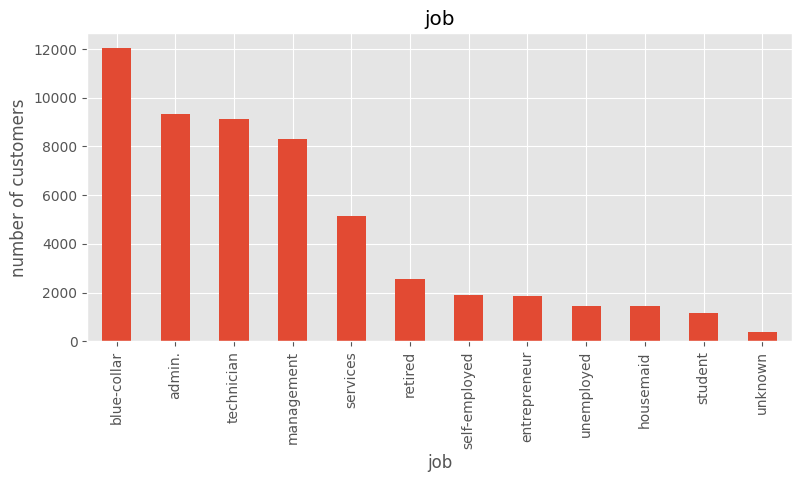

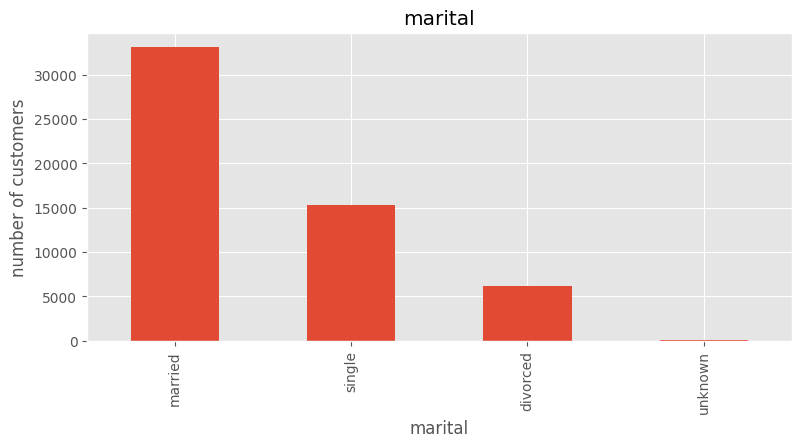

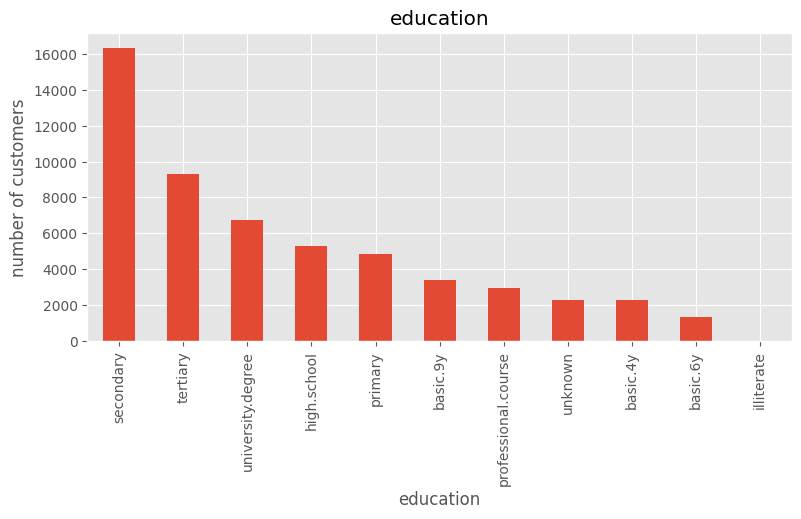

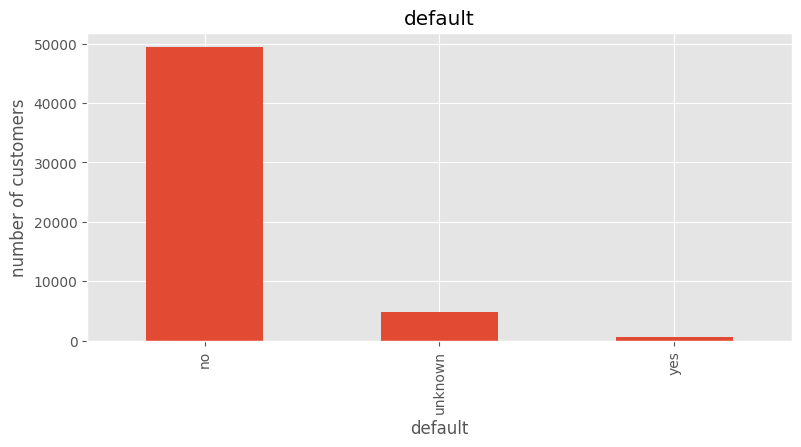

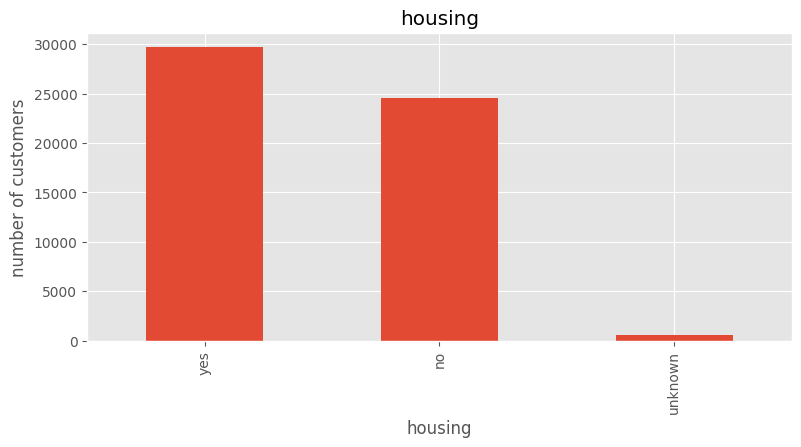

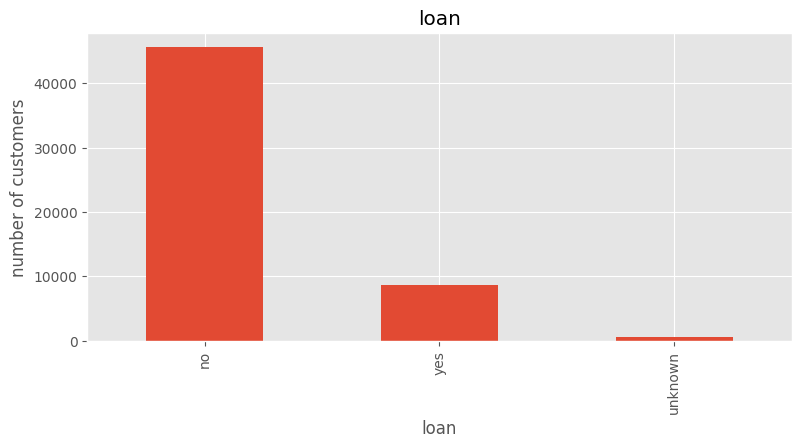

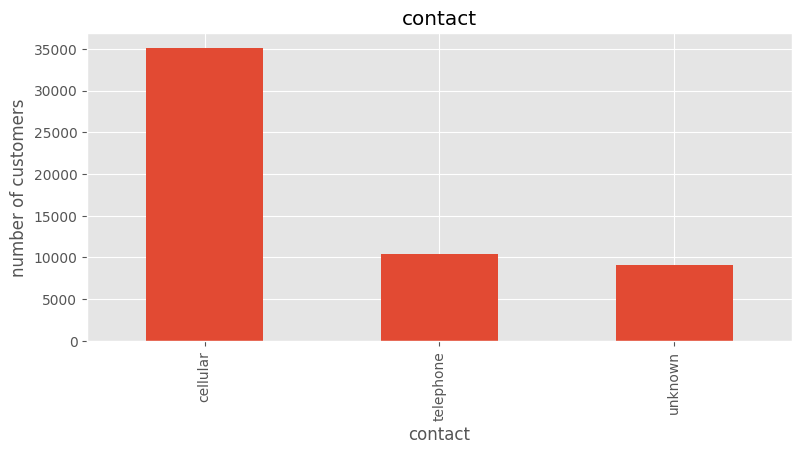

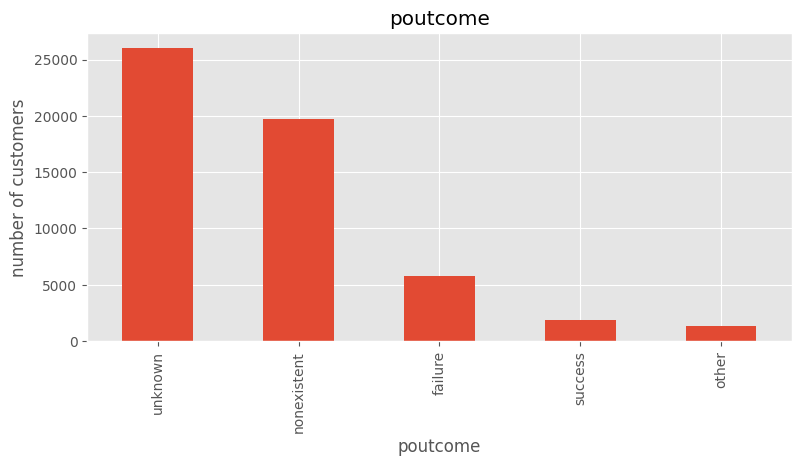

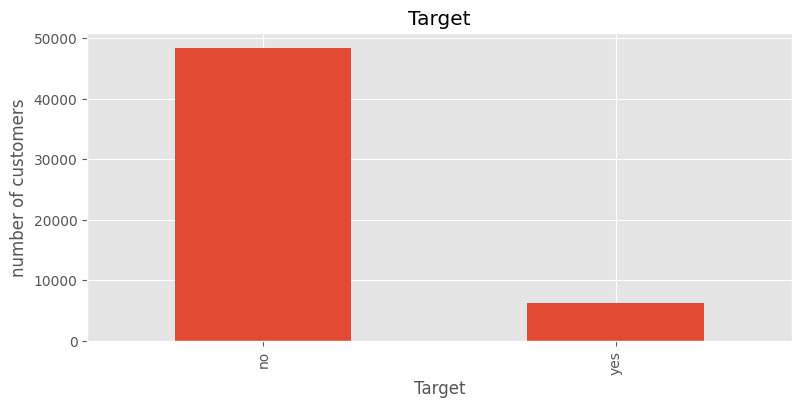

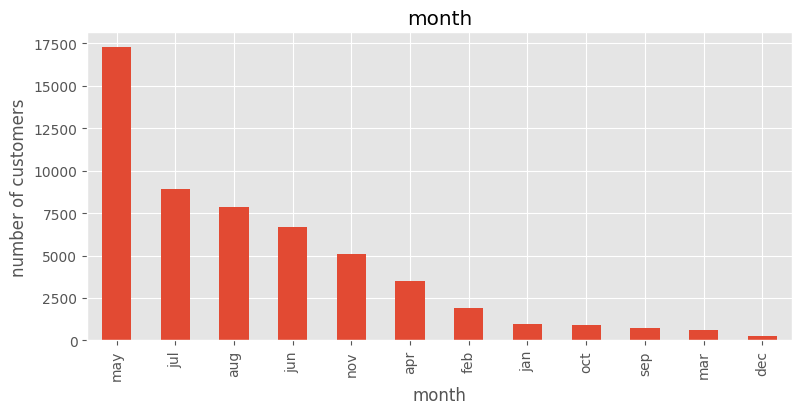

In [ ]:
# indentifying the categorical variables
cat_var= df_train.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df_train[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

Observations :

The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.

A huge number of the customers are married.

Majority of the customers do not have a credit in default

Many of our past customers have applied for a housing loan but very few have applied for personal loans.

Cell-phones seem to be the most favoured method of reaching out to customers.

Many customers have been contacted in the month of May.

The plot for the target variable shows heavy imbalance in the target variable

The columns “Unnamed: 0” and “id” were removed because they do not contain any predictive information and could negatively impact model performance. The test set ID was stored separately to be included later in the prediction submission fil

In [ ]:
# Drop unnecessary columns
cols_to_drop = ['Unnamed: 0', 'id']
test_id = df_test['id']

df_train= df_train.drop(columns=cols_to_drop, errors='ignore')
df_test = df_test.drop(columns=cols_to_drop, errors='ignore')

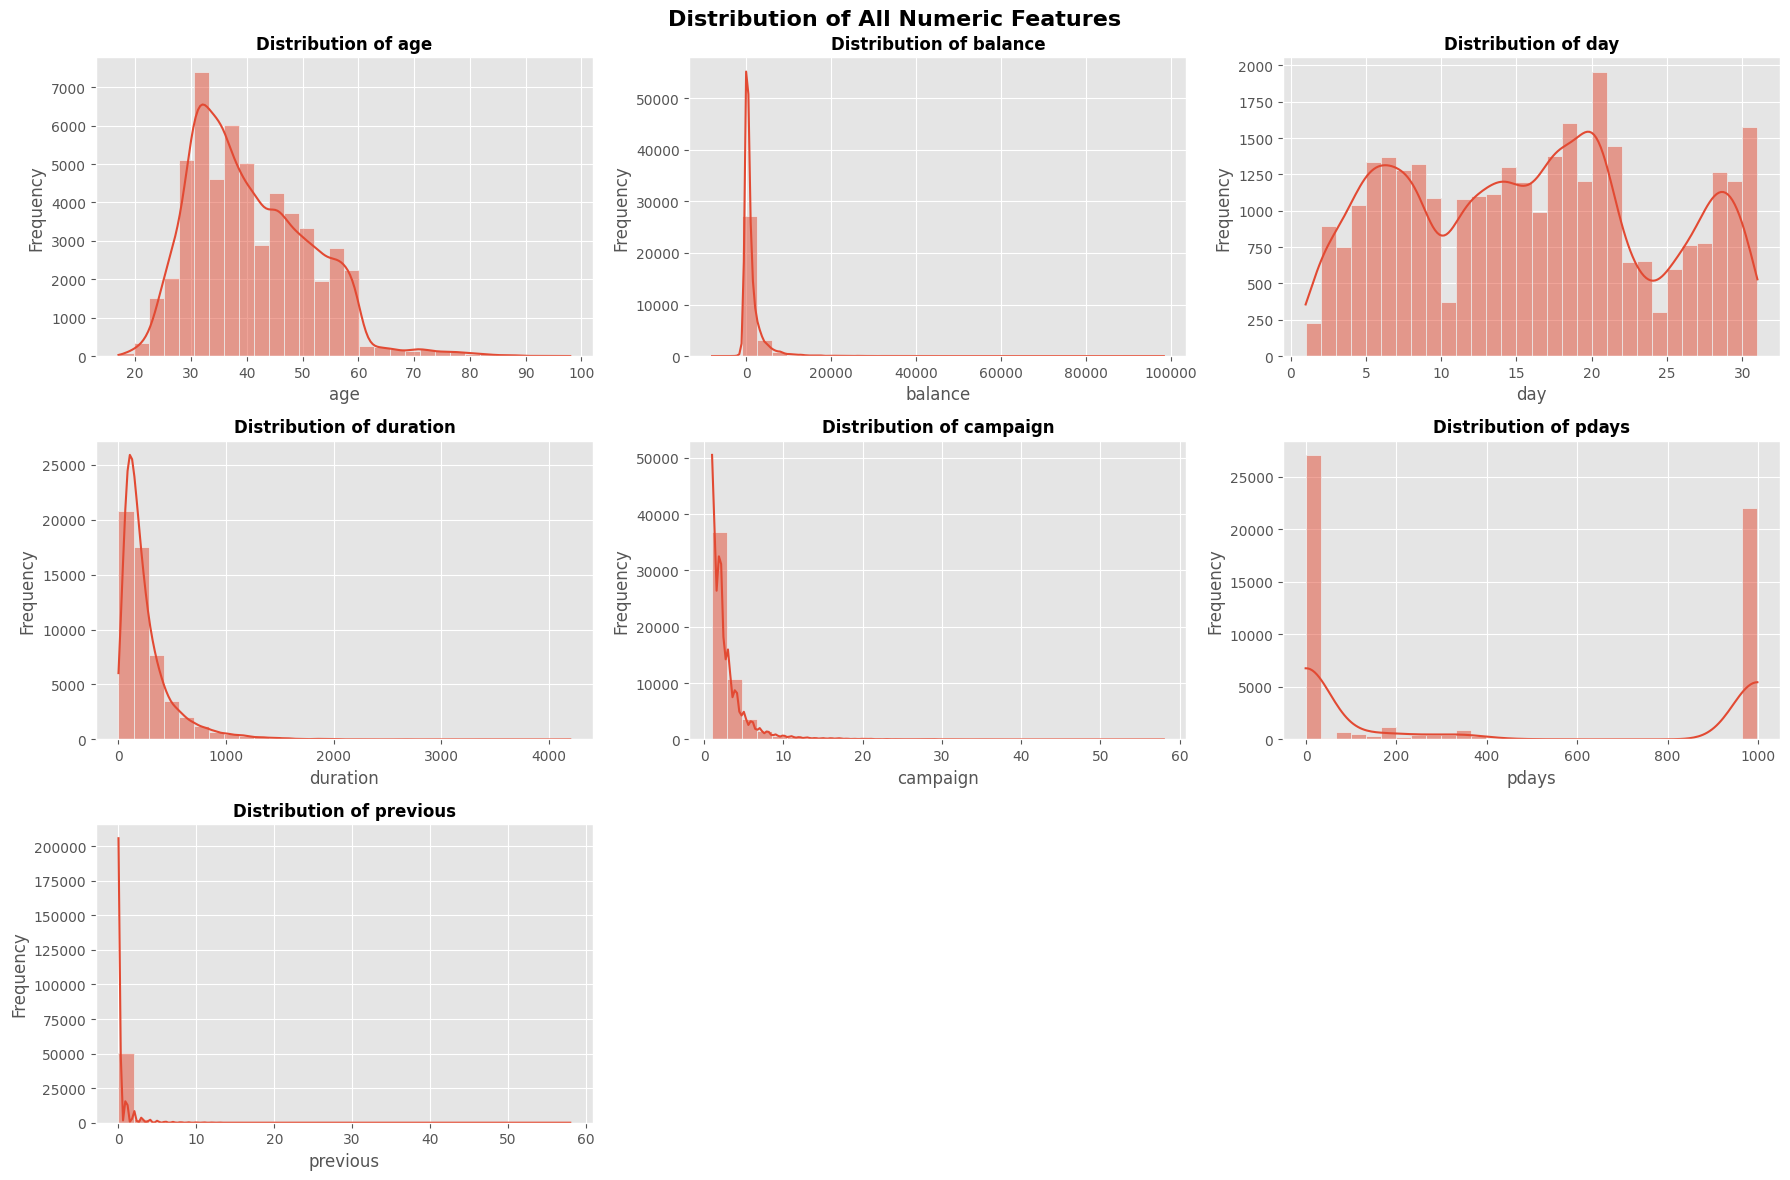

In [ ]:
# Get all numeric columns
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove id columns if present
numeric_cols = [col for col in numeric_cols if col not in ['id', 'Unnamed: 0']]

# Create subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.histplot(data=df_train, x=col, kde=True, ax=axes[idx], bins=30)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide extra subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution of All Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

5. Pdays Distribution 📅 ⚠️ BIMODAL!
Shape: U-shaped (bimodal) - Two distinct groups!
Insights:

First Peak: ~28,000 customers at pdays = -1 (NEVER contacted before)
Second Peak: ~22,000 customers at pdays = 999 (contacted LONG ago)
Middle Valley: Very few customers contacted recently (100-800 days ago)
Pattern: Either brand new customers OR very old contacts
Special Value: -1 is a flag meaning "no previous contact"
Business Insight:

Bank either targets NEW customers or re-engages OLD ones
Recent follow-ups (30-180 days) are rare
Missing middle suggests gap in re-engagement strategy


Actionable:

Create binary feature: contacted_before (yes/no)
Create categories: never (-1), recent (0-90), old (91-998), very_old (999)

⚠️ Critical Warnings

Duration: Your strongest predictor BUT it's known ONLY after the call. Don't use it for pre-call prediction!
Balance: Extreme outliers - must transform or cap
Pdays = -1: This is a special flag, not a real number
Campaign outliers: Some customers contacted 60 times - consider capping

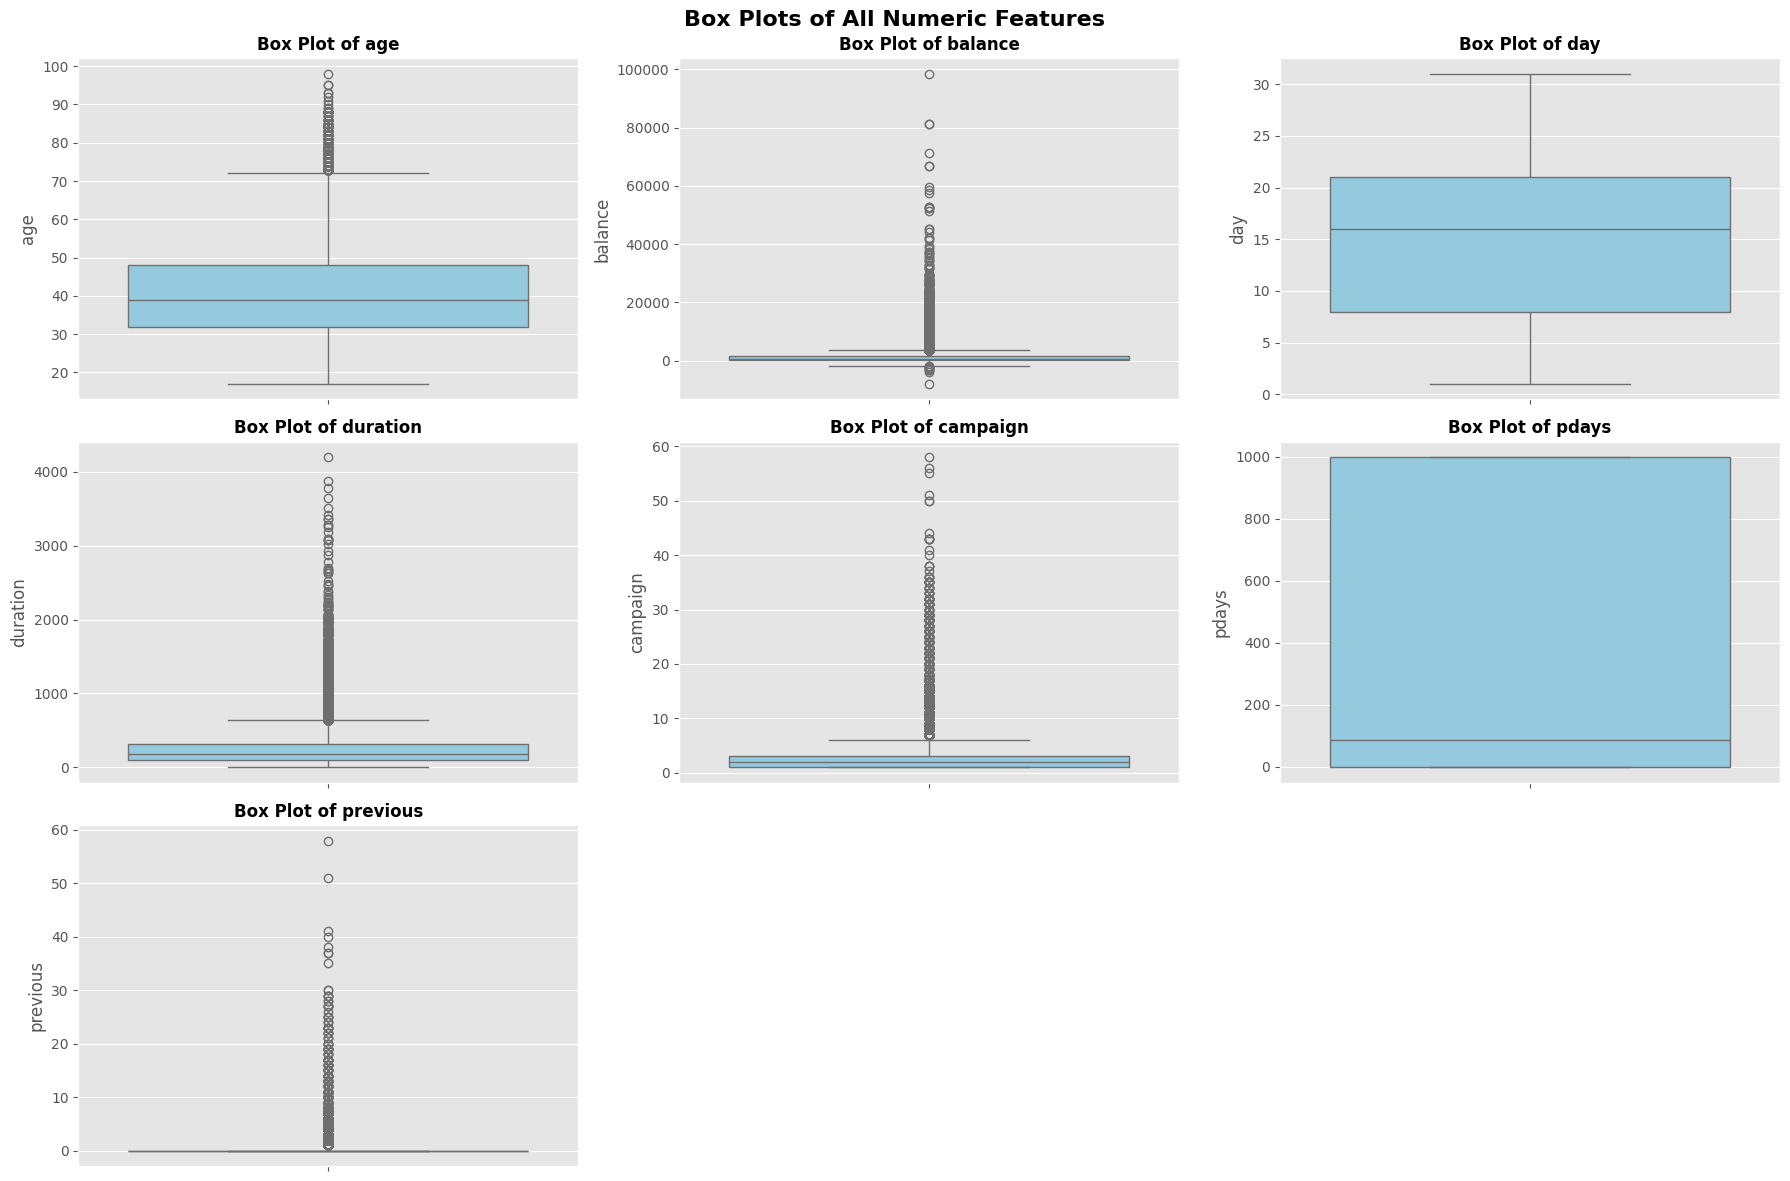

In [ ]:
# Box plots for all numeric features
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['id', 'Unnamed: 0']]

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=df_train, y=col, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)

# Hide extra subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Box Plots of All Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

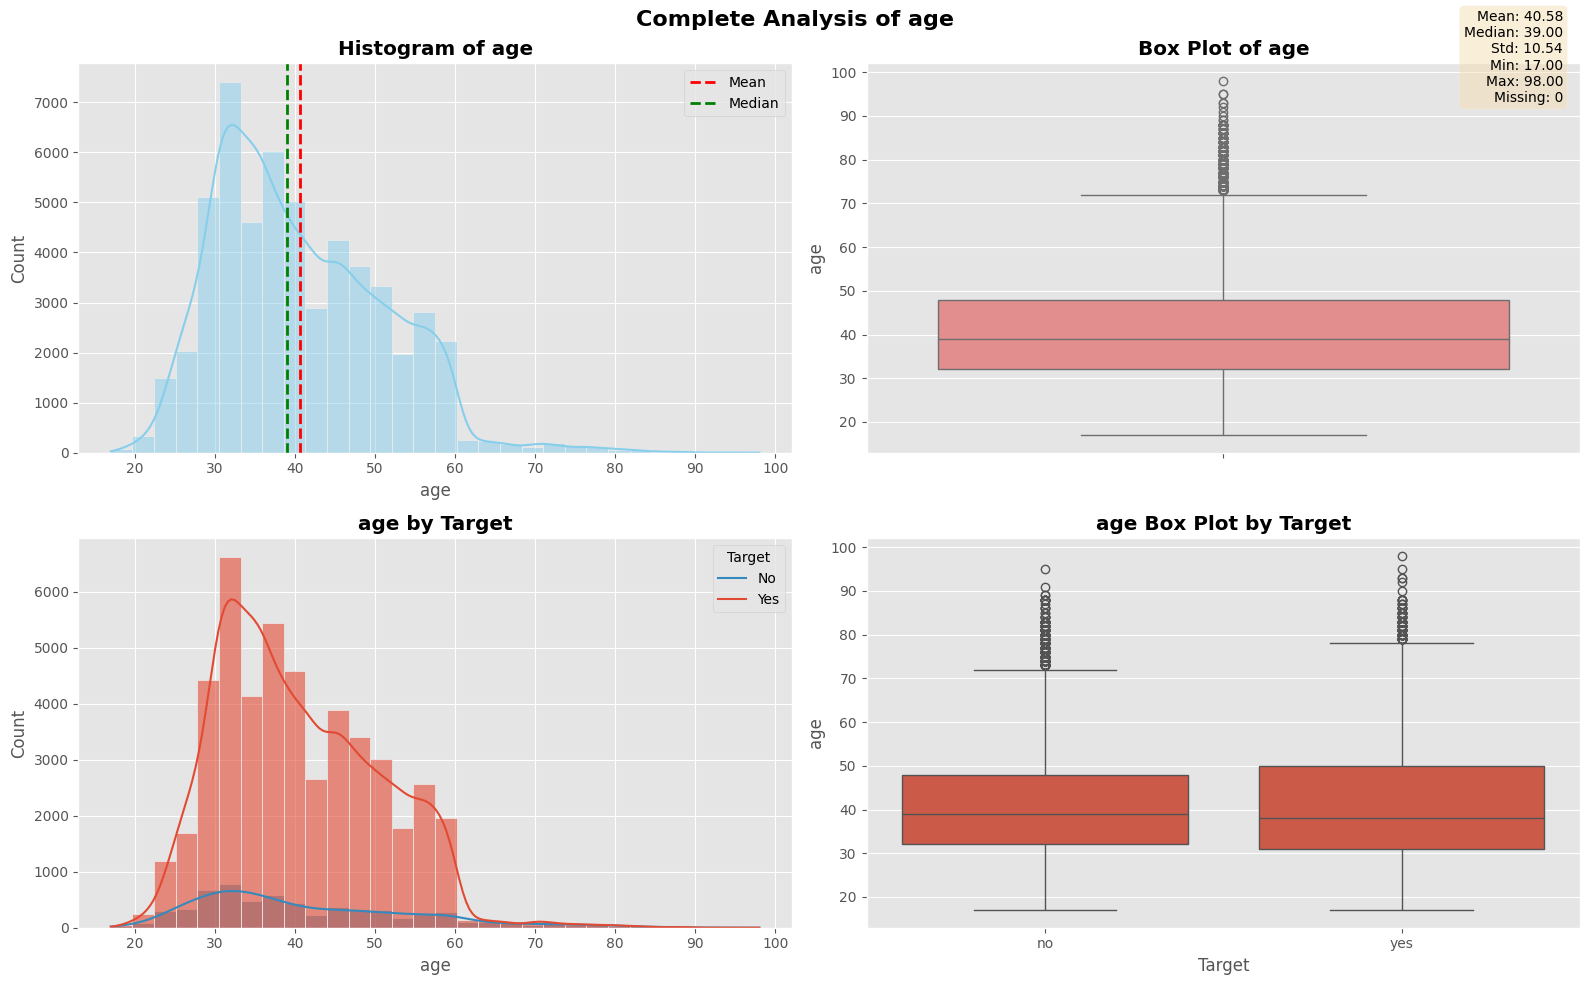

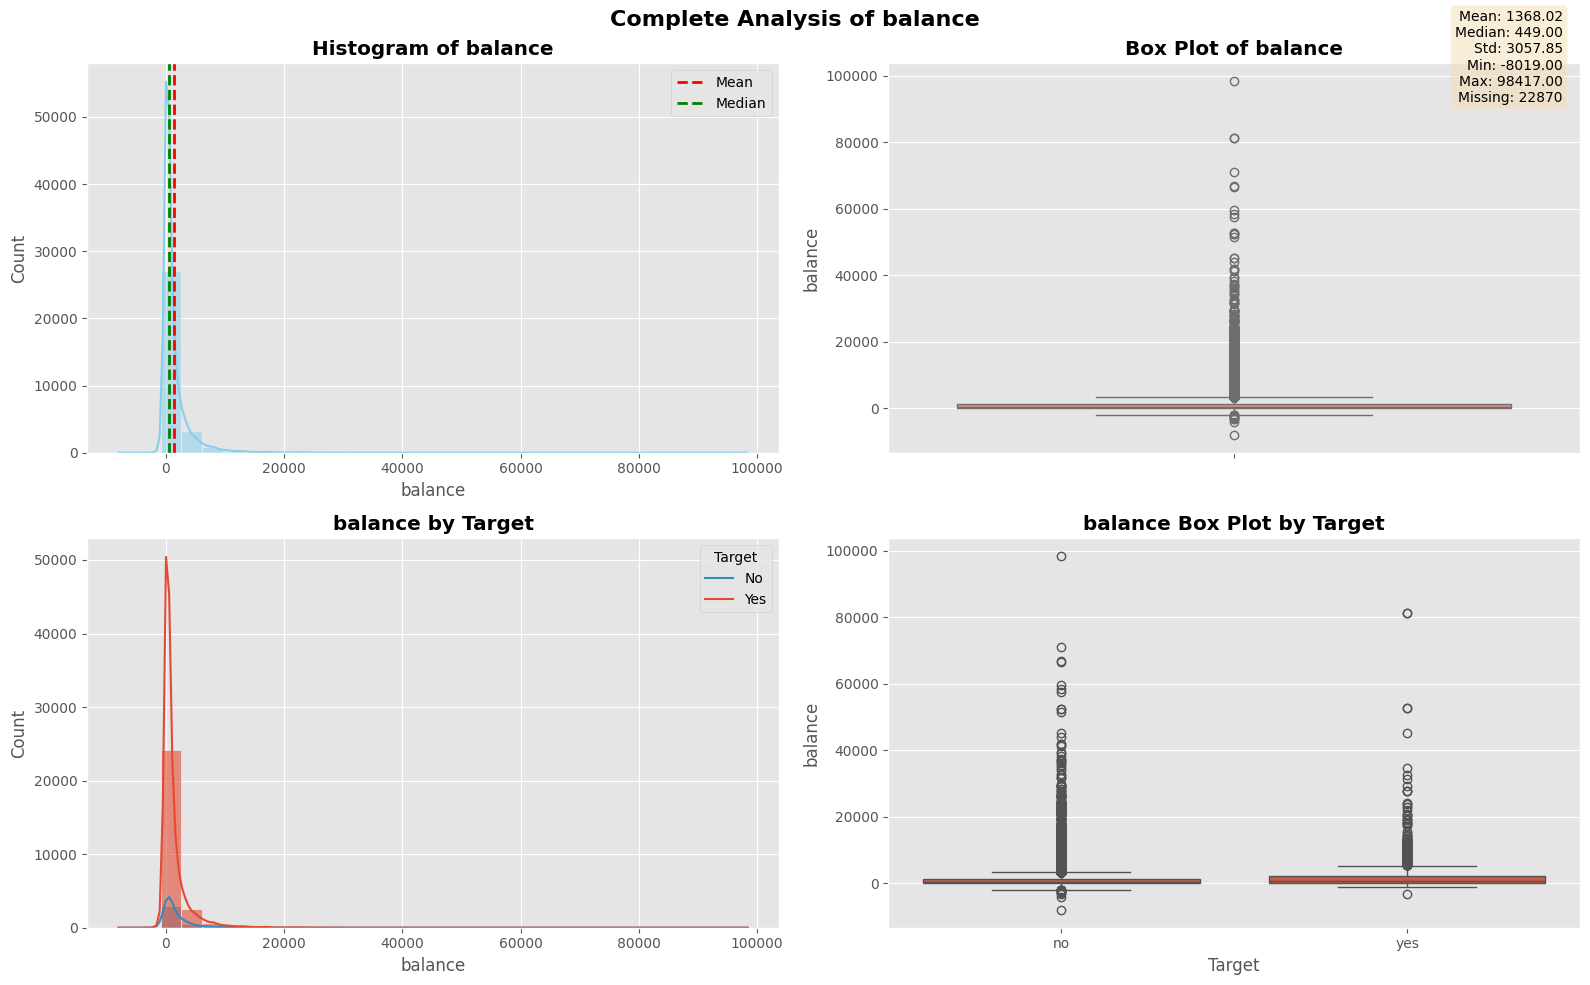

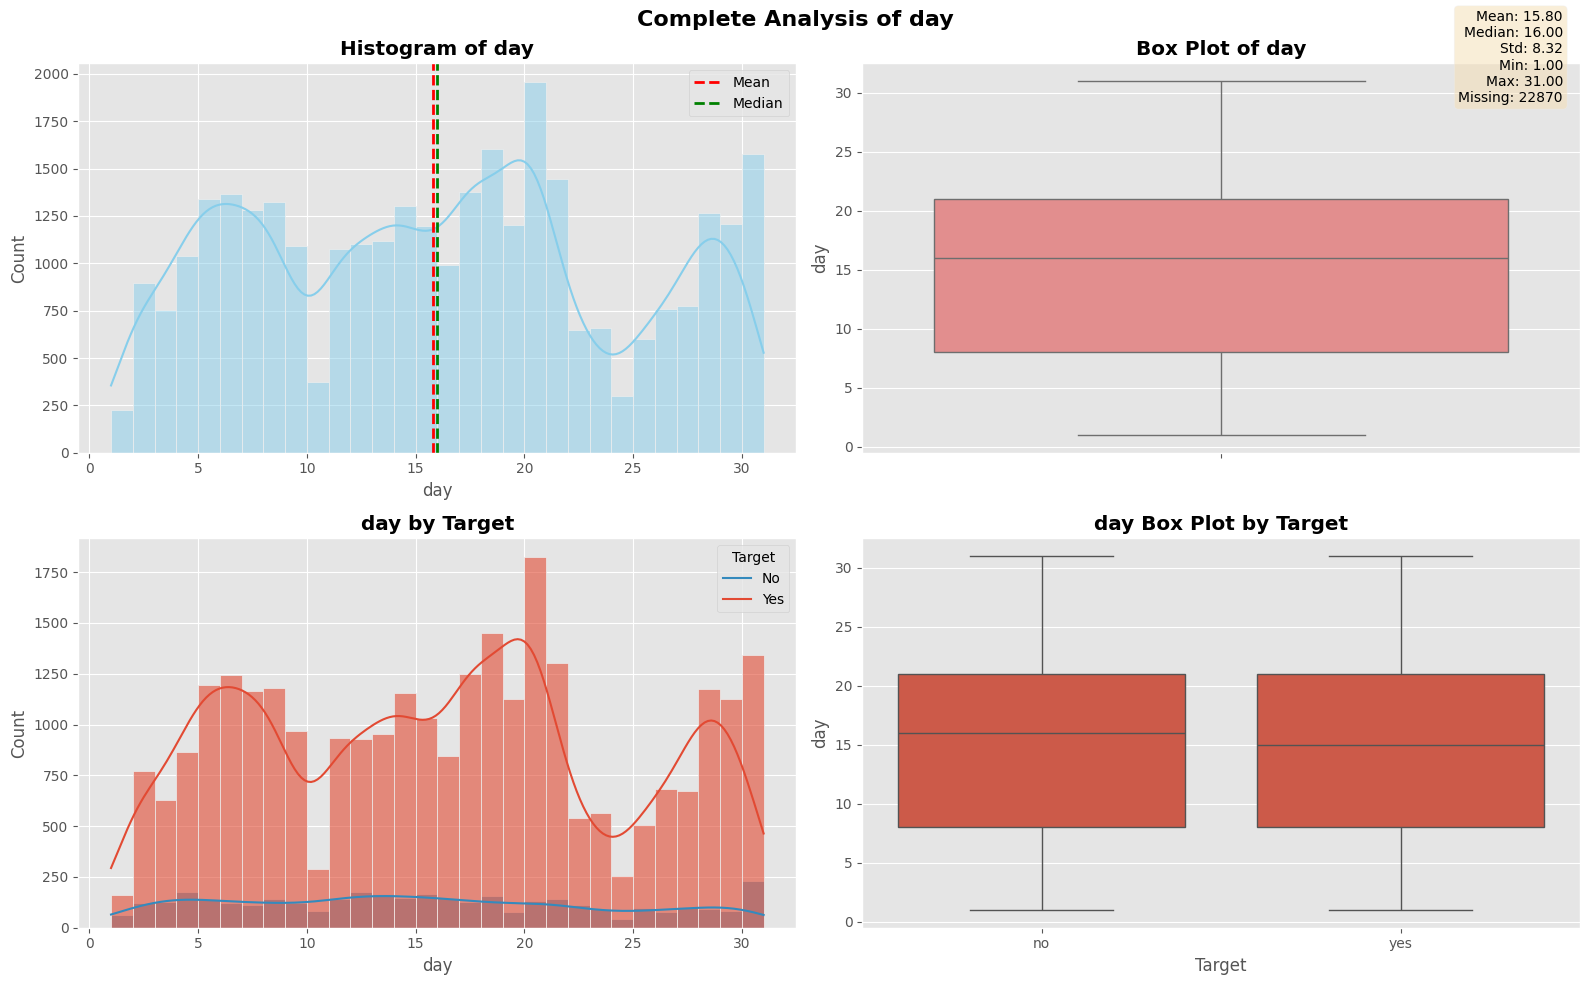

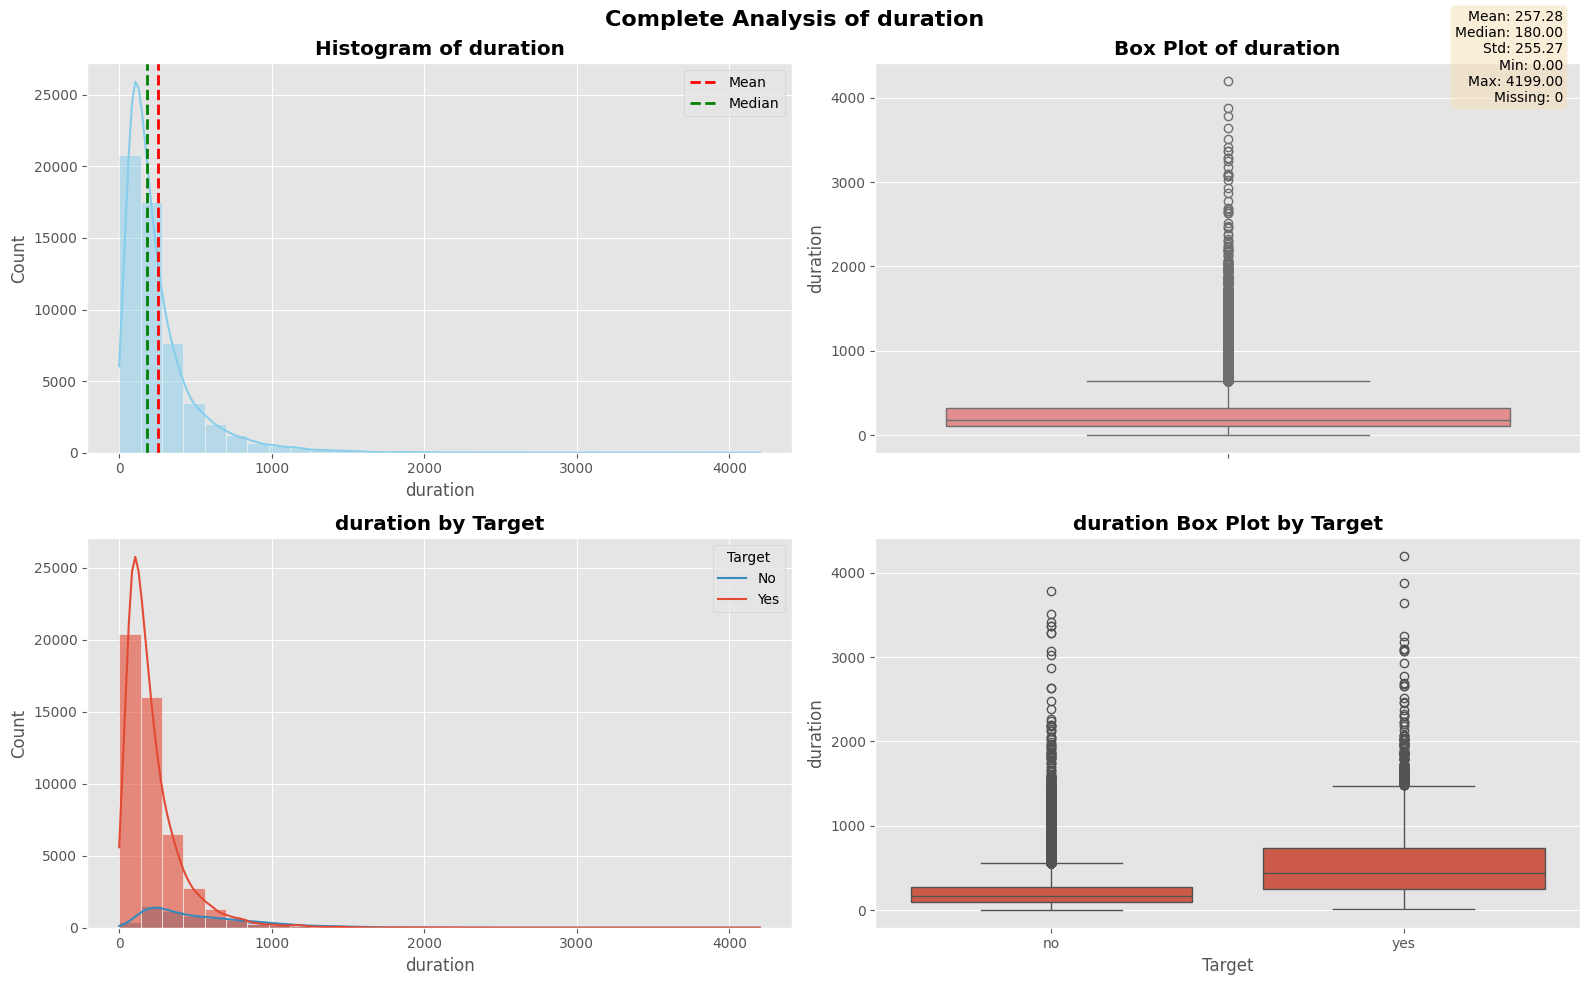

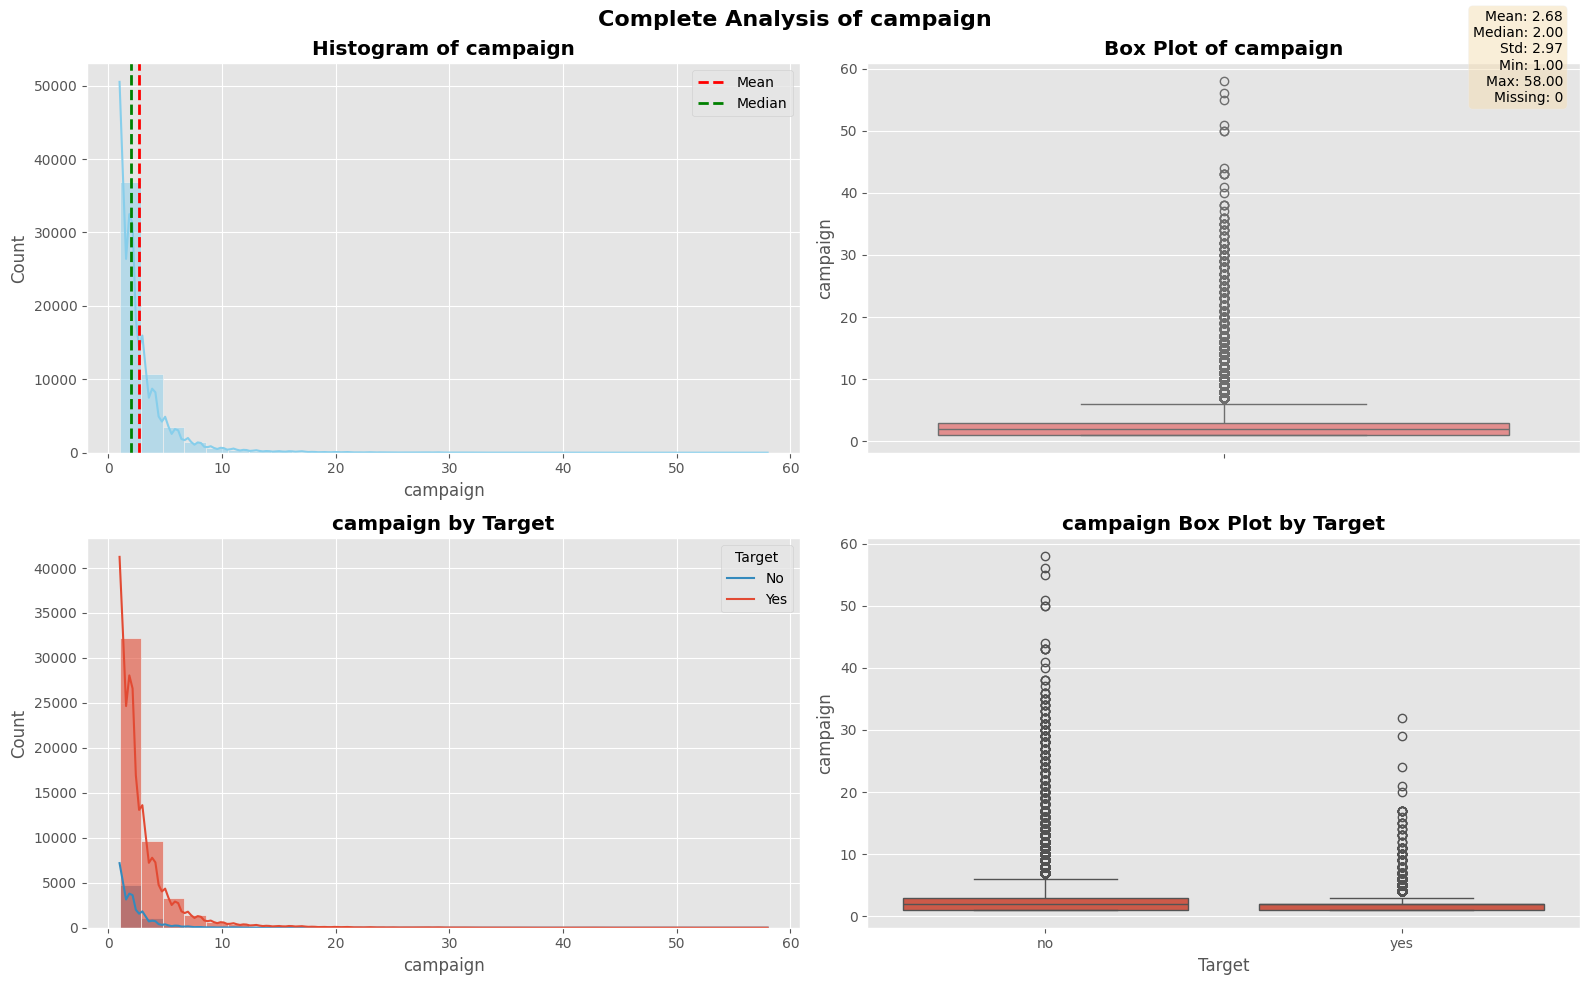

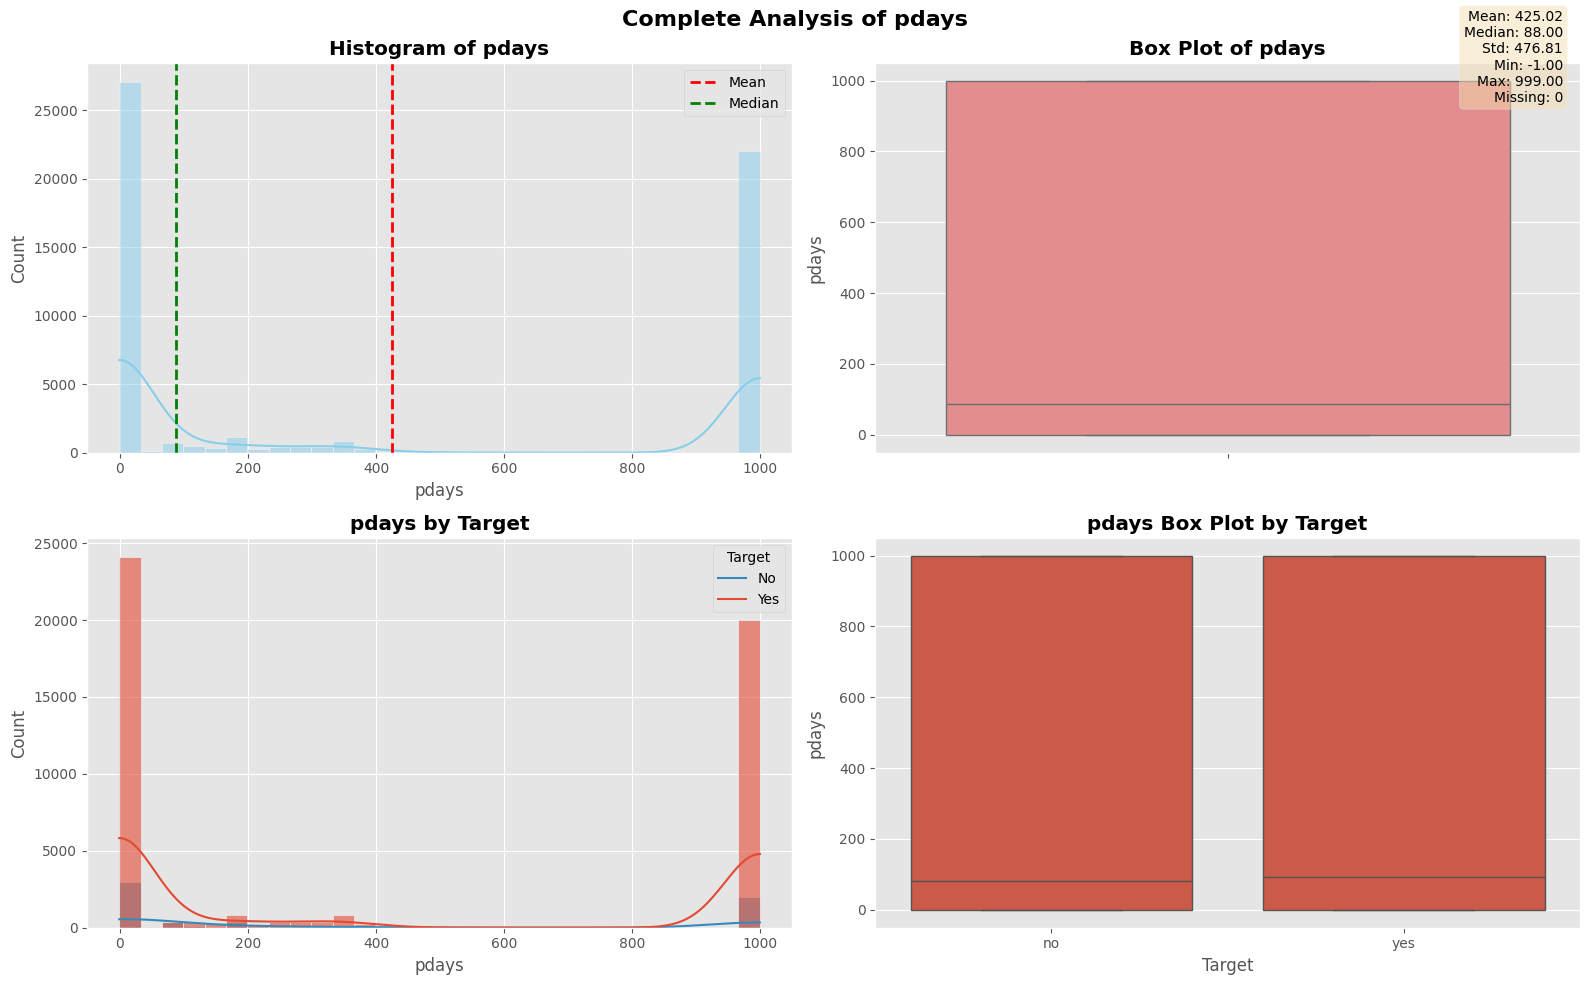

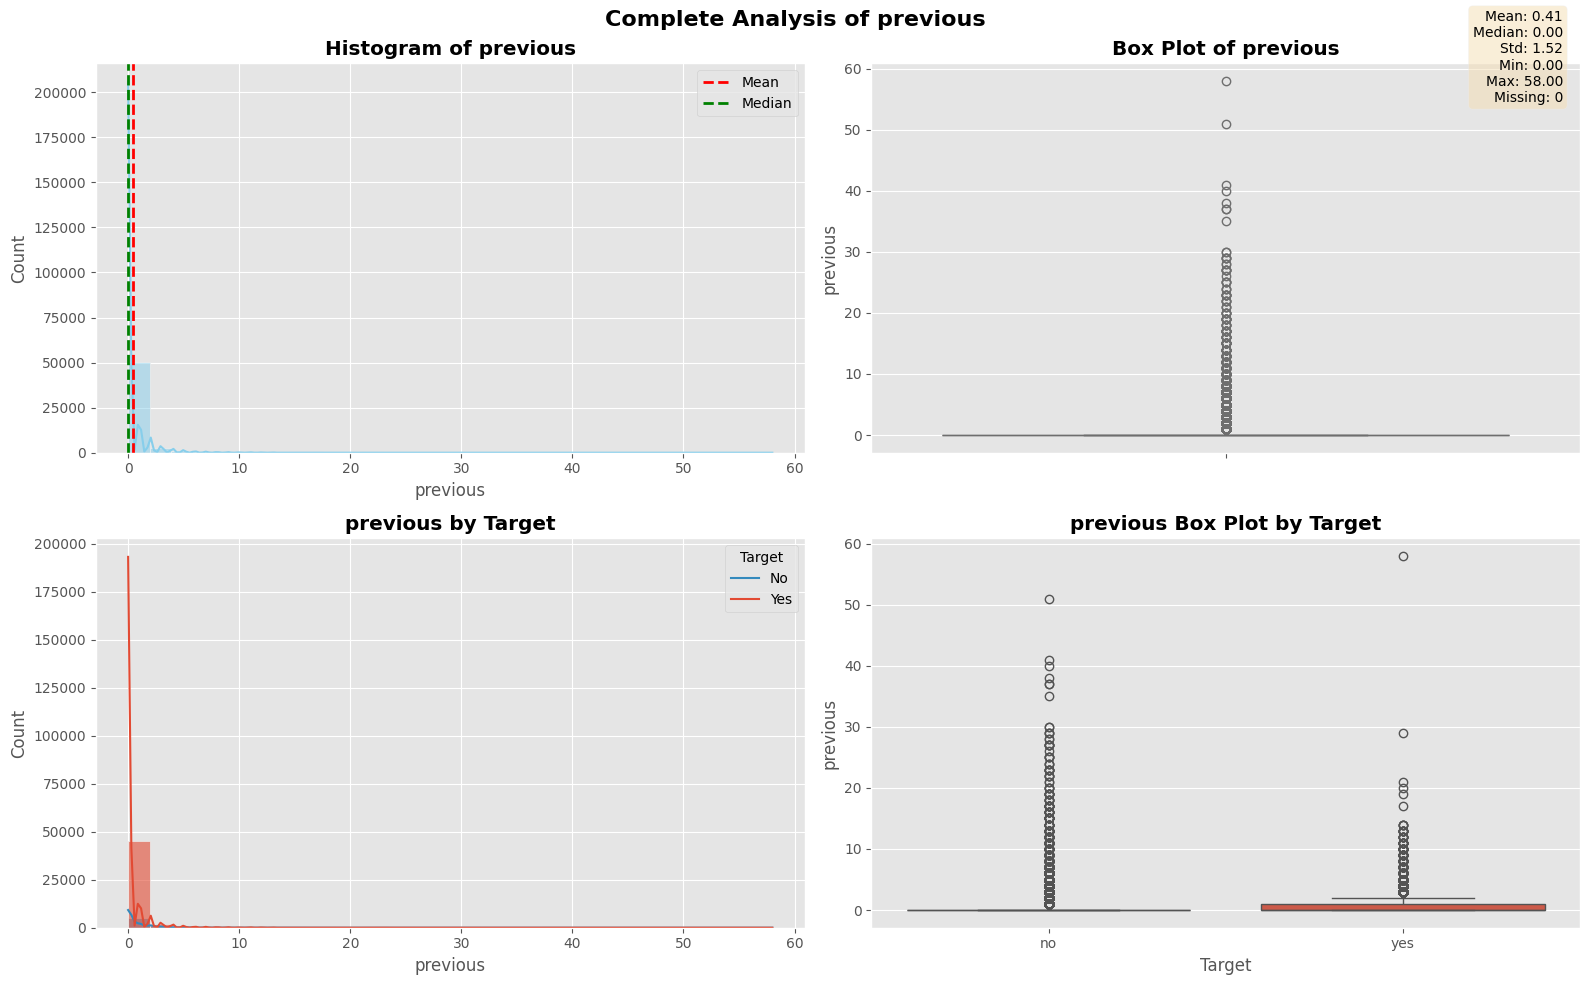

In [ ]:
# Complete numeric analysis dashboard
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['id', 'Unnamed: 0']]

for col in numeric_cols:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # 1. Histogram with KDE
    sns.histplot(data=df_train, x=col, kde=True, ax=axes[0, 0], bins=30, color='skyblue')
    axes[0, 0].set_title(f'Histogram of {col}', fontweight='bold')
    axes[0, 0].axvline(df_train[col].mean(), color='red', linestyle='--',
                       linewidth=2, label='Mean')
    axes[0, 0].axvline(df_train[col].median(), color='green', linestyle='--',
                       linewidth=2, label='Median')
    axes[0, 0].legend()

    # 2. Box Plot
    sns.boxplot(data=df_train, y=col, ax=axes[0, 1], color='lightcoral')
    axes[0, 1].set_title(f'Box Plot of {col}', fontweight='bold')

    # 3. Distribution by Target
    sns.histplot(data=df_train, x=col, hue='Target', kde=True,
                 ax=axes[1, 0], bins=30, alpha=0.6)
    axes[1, 0].set_title(f'{col} by Target', fontweight='bold')
    axes[1, 0].legend(title='Target', labels=['No', 'Yes'])

    # 4. Box Plot by Target
    sns.boxplot(data=df_train, x='Target', y=col, ax=axes[1, 1])
    axes[1, 1].set_title(f'{col} Box Plot by Target', fontweight='bold')

    # Add statistics text
    stats_text = f"Mean: {df_train[col].mean():.2f}\n"
    stats_text += f"Median: {df_train[col].median():.2f}\n"
    stats_text += f"Std: {df_train[col].std():.2f}\n"
    stats_text += f"Min: {df_train[col].min():.2f}\n"
    stats_text += f"Max: {df_train[col].max():.2f}\n"
    stats_text += f"Missing: {df_train[col].isnull().sum()}"

    fig.text(0.98, 0.98, stats_text, transform=fig.transFigure,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.suptitle(f'Complete Analysis of {col}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")

In [ ]:
df_train.pdays.value_counts()

,count
pdays,
-1,26054
999,21996
3,261
6,251
182,117
...,...
838,1
756,1
481,1


In [ ]:
df_train.previous.value_counts()

,count
previous,
0,45758
1,4513
2,1921
3,913
4,529
5,327
6,197
7,133
8,91


Since pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.
| Your Feature                            | Meaning                              |
| --------------------------------------- | ------------------------------------ |
| `no_prev_contact = (pdays == -1)`       | Never contacted before               |
| `contacted_recently = (0 < pdays < 90)` | Contacted recently (within 3 months) |

These 2 features capture ALL useful information in pdays.

✅ Step 1 — Convert "unknown" → NaN (Correct Missing Format)

We will convert "unknown" into true missing values only for features where it doesn’t carry meaning:

✔ default
✔ housing
✔ loan
✔ education (for unknown education)
✔ marital (rare cases)

❌ We DO NOT convert "unknown" in:

contact 🚫 → “unknown contact method” is behavior-meaningful

poutcome 🚫 → “unknown previous outcome” tells us something

In [ ]:
def convert_unknown_to_nan(df_train, df_test):
    """Convert 'unknown' values to NaN"""

    cols_unknown_as_missing = ['default', 'housing', 'loan', 'education', 'marital' , "job" ]

    for col in cols_unknown_as_missing:
        if col in df_train.columns:
            df_train[col] = df_train[col].replace("unknown", np.nan)
        if col in df_test.columns:
            df_test[col] = df_test[col].replace("unknown", np.nan)

    print("✅ Converted 'unknown' → NaN for appropriate features")
    return df_train, df_test

In [ ]:
df_train, df_test = convert_unknown_to_nan(df_train, df_test)

✅ Converted 'unknown' → NaN for appropriate features


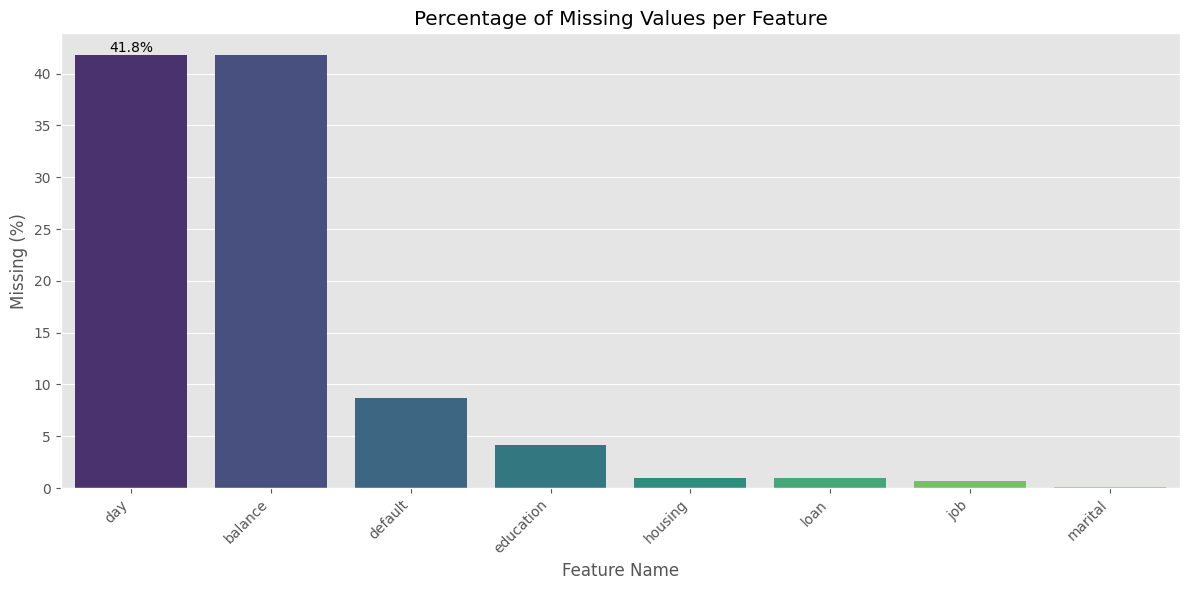

In [ ]:
# Step 1: Create missing values summary
missing_df = df_train.isnull().mean() * 100
missing_df = missing_df[missing_df > 0].sort_values(ascending=False)
missing_df = missing_df.reset_index()
missing_df.columns = ['Feature', 'Missing_Percent']

# Step 2: Plot (fixed version)
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Feature', y='Missing_Percent',
    hue='Feature', data=missing_df, legend=False,
    palette='viridis'
)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.title('Percentage of Missing Values per Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Missing (%)")
plt.xlabel("Feature Name")
plt.tight_layout()
plt.show()


In [ ]:
def create_missing_indicators(df_train, df_test):
    """Create missing indicators BEFORE any imputation"""

    # Check which columns have missing values in train
    cols_with_missing = df_train.columns[df_train.isnull().any()].tolist()

    print(f"\n📊 Columns with missing values: {len(cols_with_missing)}")
    for col in cols_with_missing:
        missing_count = df_train[col].isnull().sum()
        missing_pct = (missing_count / len(df_train)) * 100
        print(f"   - {col}: {missing_count} ({missing_pct:.2f}%)")

        # Create indicator
        df_train[f'{col}_was_missing'] = df_train[col].isnull().astype(int)
        df_test[f'{col}_was_missing'] = df_test[col].isnull().astype(int)

    print("\n✅ Missing indicators created")
    return df_train, df_test, cols_with_missing

In [ ]:
df_train, df_test, cols_with_missing = create_missing_indicators(df_train, df_test)


📊 Columns with missing values: 8
   - job: 376 (0.69%)
   - marital: 46 (0.08%)
   - education: 2276 (4.16%)
   - default: 4754 (8.69%)
   - balance: 22870 (41.80%)
   - housing: 543 (0.99%)
   - loan: 543 (0.99%)
   - day: 22870 (41.80%)

✅ Missing indicators created


In [ ]:
# ===============================================
# STEP 3: SEPARATE NUMERIC AND CATEGORICAL
# ===============================================

def separate_features(df, target_col='Target'):
    """Separate numeric and categorical features"""

    # Identify feature types
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Remove target and id columns
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)
    if 'id' in numeric_cols:
        numeric_cols.remove('id')
    if 'Unnamed: 0' in numeric_cols:
        numeric_cols.remove('Unnamed: 0')

    # Remove missing indicator columns from imputation
    numeric_cols = [col for col in numeric_cols if not col.endswith('_was_missing')]

    print(f"\n📋 Feature types:")
    print(f"   Numeric: {len(numeric_cols)} features")
    print(f"   Categorical: {len(categorical_cols)} features")

    return numeric_cols, categorical_cols

In [ ]:
numeric_cols, categorical_cols = separate_features(df_train)


📋 Feature types:
   Numeric: 7 features
   Categorical: 9 features


In [ ]:
def impute_numeric_features(df_train, df_test, numeric_cols, method='knn', k=5):
    """
    Impute numeric features using specified method
    ⚠️ FIT ONLY ON TRAIN, TRANSFORM ON TEST
    """

    print(f"\n🔧 Imputing numeric features using {method.upper()}...")

    train_numeric = df_train[numeric_cols].copy()
    test_numeric = df_test[numeric_cols].copy()

    if method == 'knn':
        # Scale before KNN (distance-based)
        scaler = StandardScaler()
        train_scaled = scaler.fit_transform(train_numeric)
        test_scaled = scaler.transform(test_numeric)

        # KNN Imputation - FIT ON TRAIN ONLY!
        knn_imputer = KNNImputer(n_neighbors=k, weights='distance')
        train_imputed = knn_imputer.fit_transform(train_scaled)
        test_imputed = knn_imputer.transform(test_scaled)

        # Inverse transform
        train_imputed = scaler.inverse_transform(train_imputed)
        test_imputed = scaler.inverse_transform(test_imputed)

        imputer = knn_imputer

    elif method == 'median':
        imputer = SimpleImputer(strategy='median')
        train_imputed = imputer.fit_transform(train_numeric)
        test_imputed = imputer.transform(test_numeric)
        scaler = None

    else:
        raise ValueError(f"Unknown method: {method}")

    # Convert back to DataFrame
    df_train[numeric_cols] = train_imputed
    df_test[numeric_cols] = test_imputed

    print(f"✅ Numeric imputation complete")
    print(f"   Missing in train: {df_train[numeric_cols].isnull().sum().sum()}")
    print(f"   Missing in test: {df_test[numeric_cols].isnull().sum().sum()}")

    return df_train, df_test, imputer, scaler

In [ ]:
def impute_categorical_features(df_train, df_test, categorical_cols):
    """
    Impute categorical features with mode
    Separate imputation for categorical is more appropriate
    """

    print(f"\n🔧 Imputing categorical features with MODE...")

    for col in categorical_cols:
        if df_train[col].isnull().sum() > 0:
            # Use mode from training data
            mode_value = df_train[col].mode()[0]
            df_train[col] = df_train[col].fillna(mode_value)
            df_test[col] = df_test[col].fillna(mode_value)

    print(f"✅ Categorical imputation complete")

    return df_train, df_test

In [ ]:
df_train, df_test, imputer, scaler = impute_numeric_features(df_train, df_test, numeric_cols, method='knn', k=5)


🔧 Imputing numeric features using KNN...
✅ Numeric imputation complete
   Missing in train: 0
   Missing in test: 0


In [ ]:
df_train, df_test = impute_categorical_features(df_train, df_test, categorical_cols)


🔧 Imputing categorical features with MODE...
✅ Categorical imputation complete


In [ ]:



print(df_train.shape)
print(df_test.shape)

(54712, 25)
(23449, 24)


In [ ]:
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())


0
0


In [ ]:
df_train.marital.value_counts()

,count
marital,
married,33141
single,15362
divorced,6209


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    54712 non-null  float64
 1   job                    54712 non-null  object 
 2   marital                54712 non-null  object 
 3   education              54712 non-null  object 
 4   default                54712 non-null  object 
 5   balance                54712 non-null  float64
 6   housing                54712 non-null  object 
 7   loan                   54712 non-null  object 
 8   contact                54712 non-null  object 
 9   day                    54712 non-null  float64
 10  duration               54712 non-null  float64
 11  campaign               54712 non-null  float64
 12  pdays                  54712 non-null  float64
 13  previous               54712 non-null  float64
 14  poutcome               54712 non-null  object 
 15  Ta

In [ ]:
def feature_engineering(df, is_train=True):
    """Create engineered features for Bank Marketing dataset."""

    print("\n🚀 Creating engineered features...")
    df = df.copy()

    # ----- Categorical Logic -----
    df['is_married'] = (df['marital'] == 'married').astype(int)
    df['contact_is_cellular'] = (df['contact'] == 'cellular').astype(int)
    df['prev_success'] = (df['poutcome'] == 'success').astype(int)
    df['has_any_debt'] = ((df['housing'] == 'yes') | (df['loan'] == 'yes')).astype(int)
    df['high_education'] = (df['education'] == 'tertiary').astype(int)

    white_collar_jobs = ['admin.', 'management', 'entrepreneur', 'self-employed']

    df['is_white_collar'] = df['job'].isin(white_collar_jobs).astype(int)



    quarter_map = {
        'jan': 1, 'feb': 1, 'mar': 1,
        'apr': 2, 'may': 2, 'jun': 2,
        'jul': 3, 'aug': 3, 'sep': 3,
        'oct': 4, 'nov': 4, 'dec': 4

    }
    df['contact_quarter'] = df['month'].map(quarter_map)

    # ----- Numeric Logic -----
    df['age_log'] = np.log1p(df['age'])
    df['age_balance_ratio'] = df['balance'] / (df['age'] + 1)

    df['balance_log'] = np.log1p(df['balance'].clip(lower=0))
    df['balance_positive'] = (df['balance'] > 0).astype(int)
    df['balance_category'] = pd.qcut(
        df['balance'],
        q=4,
        labels=[0, 1, 2, 3],
        duplicates='drop'
    ).astype('Int64')


    df['no_prev_contact'] = (df['pdays'] == -1).astype(int)
    df['contacted_recently'] = ((df['pdays'] > 0) & (df['pdays'] < 90)).astype(int)
    df['high_campaign'] = (df['campaign'] > 3).astype(int)

    df['had_previous'] = (df['previous'] > 0).astype(int)

     # ============================================================
    # 6️⃣ Interaction Features (Signal Amplifiers)
    # ============================================================
    df['success_and_recent'] = df['prev_success'] * df['contacted_recently']
    df['debt_and_balance'] = df['has_any_debt'] * df['balance_positive']
    df['education_job_interaction'] = df['high_education'] * df['is_white_collar']




    df['success_and_recent'] = df['prev_success'] * df['contacted_recently']

    df['balance_category'] = pd.cut(
        df['balance'],
        bins=[-np.inf, 0, 1000, 5000, np.inf],
        labels=[0, 1, 2, 3]
    ).astype("Int64")

    df['long_call'] = (df['duration'] > 300).astype(int)

    # Optional but powerful
    df['call_efficiency'] = df['duration'] / (df['campaign'] + 1)

    print("✅ Feature engineering complete!")
    return df


In [ ]:
df_train = feature_engineering(df_train , is_train= True )
df_test = feature_engineering(df_test, is_train=False)


🚀 Creating engineered features...
✅ Feature engineering complete!

🚀 Creating engineered features...
✅ Feature engineering complete!


In [ ]:


def bivariate_categorical_analysis(df, target_col="Target", positive_class="yes"):
    """
    Professional Bivariate Analysis: Categorical Features vs Binary Target
    → Generates ONE FIGURE PER FEATURE (3 subplots)
    """

    sns.set(style="whitegrid")

    # Detect categorical columns
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)

    print(f"\n🔍 Performing Bivariate Analysis for {len(categorical_cols)} categorical features...\n")

    for col in categorical_cols:

        print(f"📌 Processing Feature: {col}")

        # Success rate table
        rate_df = (
            df.groupby(col)[target_col]
            .apply(lambda x: (x == positive_class).mean())
            .reset_index()
            .rename(columns={target_col: "success_rate"})
        )

        # Count distribution table
        count_df = (
            df.groupby([col, target_col]).size()
            .reset_index(name="count")
        )

        # Create figure with 3 subplots
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f"{col} — Bivariate Analysis", fontsize=16, fontweight="bold")

        # -------------------------------------------
        # 1️⃣ Count Distribution
        sns.countplot(data=df, x=col, hue=target_col, ax=axes[0])
        axes[0].set_title("Count Distribution")
        axes[0].tick_params(axis='x', rotation=45)

        # -------------------------------------------
        # 2️⃣ % Positive Class (Bar Plot)
        sns.barplot(data=rate_df, x=col, y="success_rate", ax=axes[1], color="skyblue")
        axes[1].set_title(f"% {positive_class}")
        axes[1].set_ylim(0, 1)
        axes[1].tick_params(axis='x', rotation=45)

        # -------------------------------------------
        # 3️⃣ Success Rate Trend (Line Chart)
        sns.pointplot(data=rate_df, x=col, y="success_rate", ax=axes[2], color="green")
        axes[2].set_title("Success Rate Trend")
        axes[2].set_ylim(0, 1)
        axes[2].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    print("\n🎯 Bivariate Analysis Complete!\n")



🔍 Performing Bivariate Analysis for 9 categorical features...

📌 Processing Feature: job


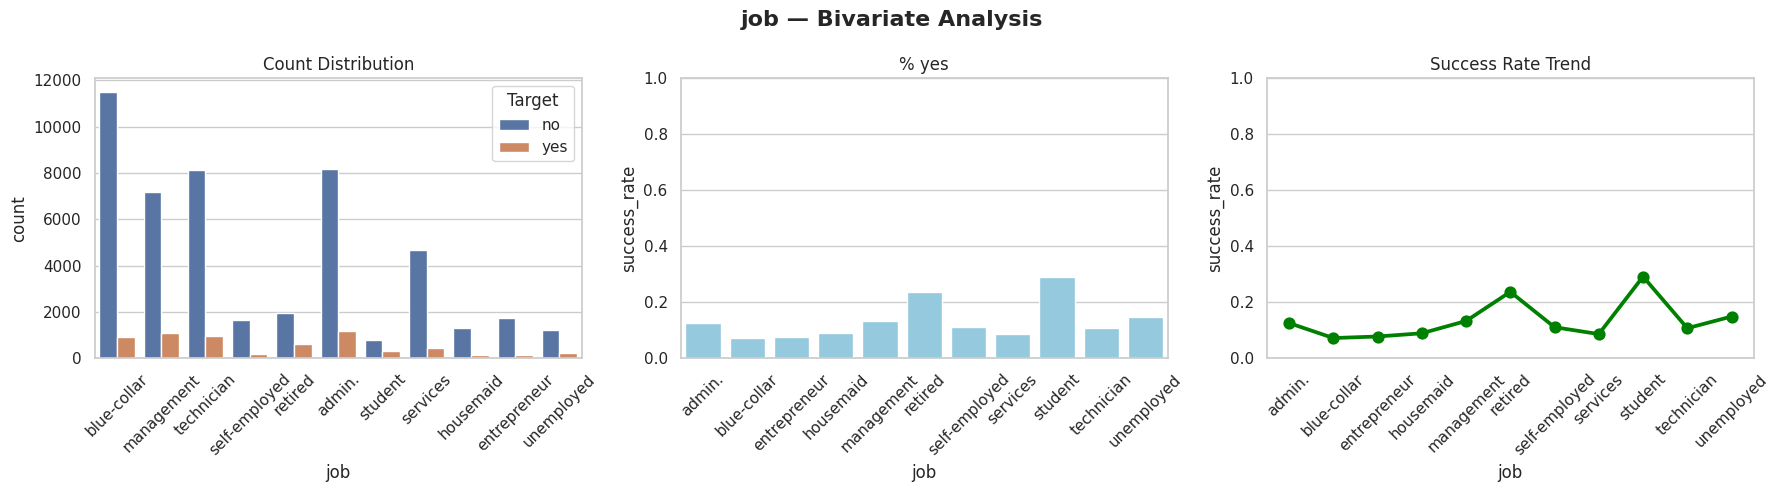

📌 Processing Feature: marital


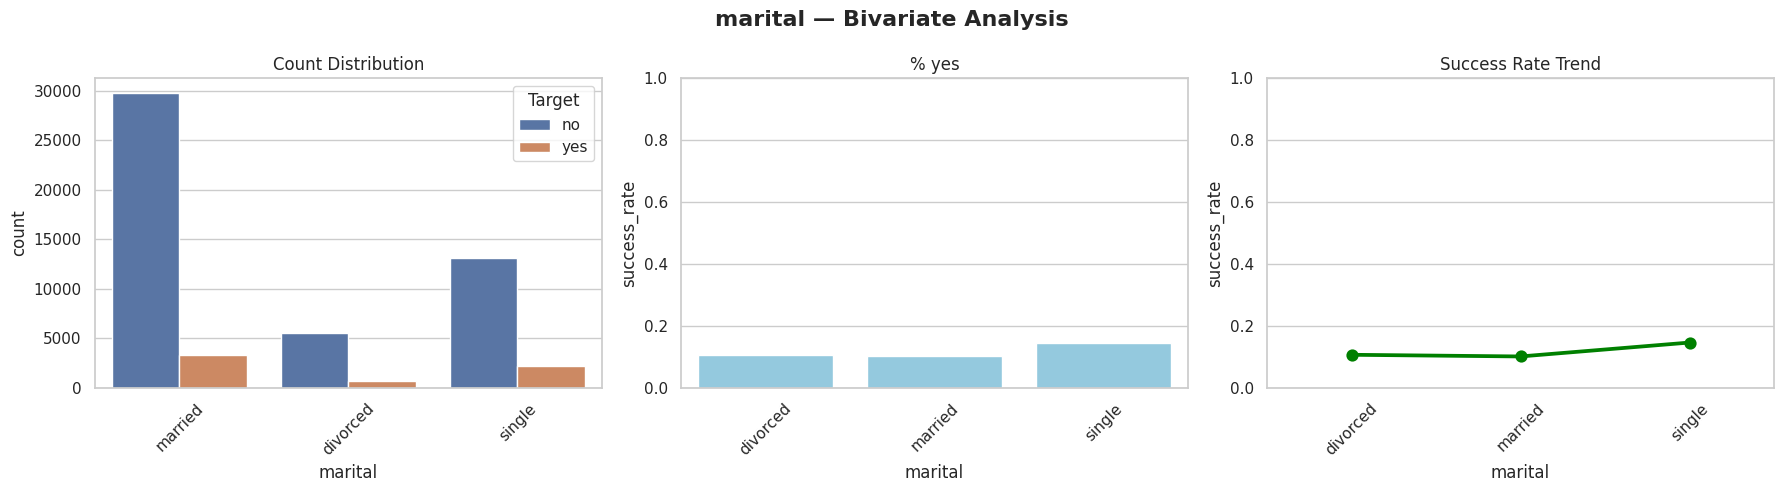

📌 Processing Feature: education


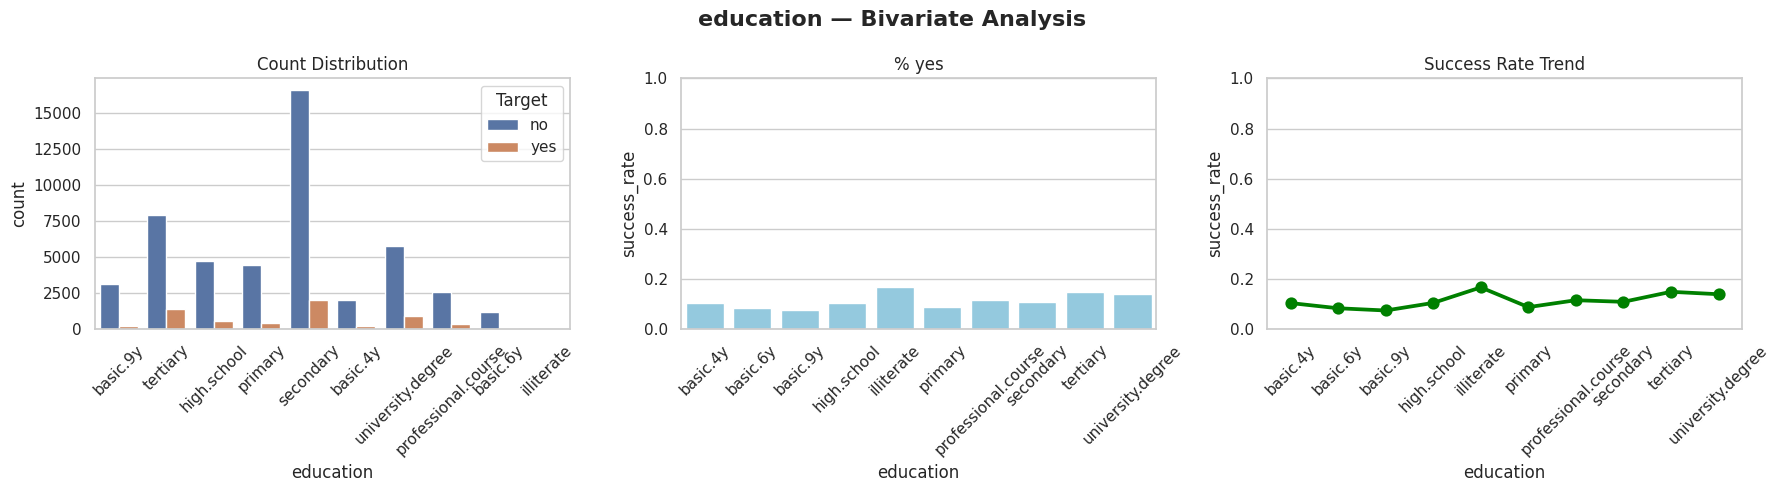

📌 Processing Feature: default


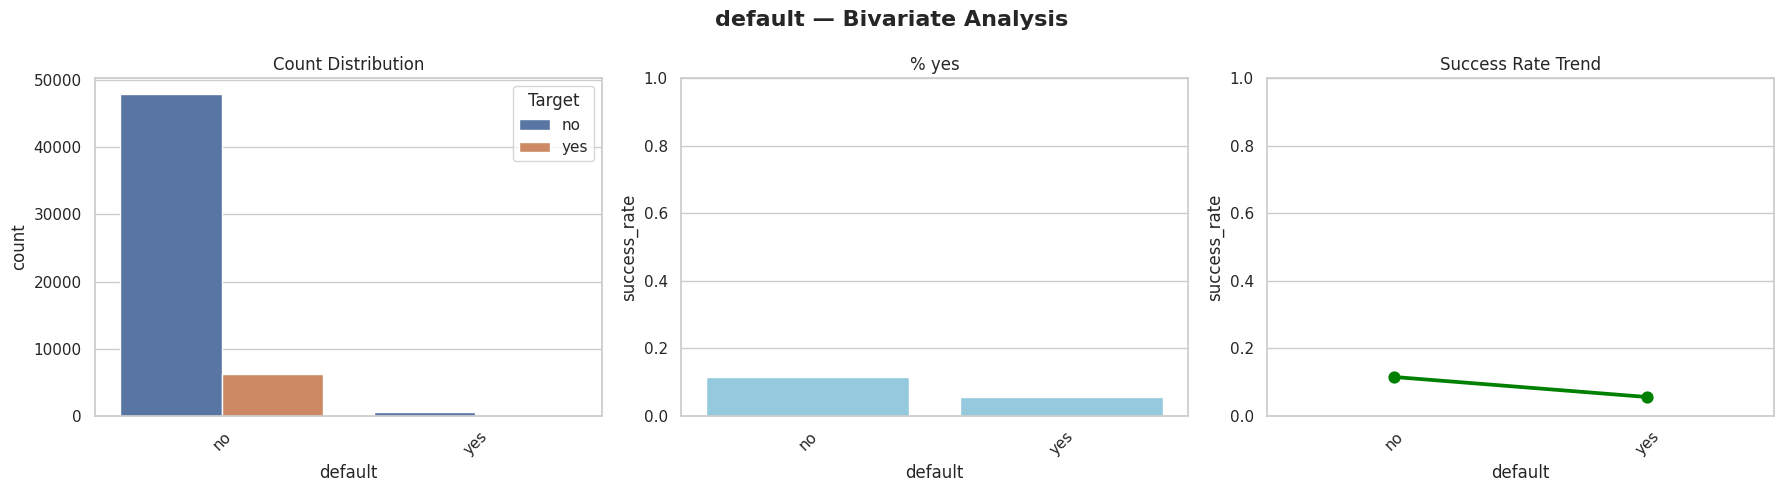

📌 Processing Feature: housing


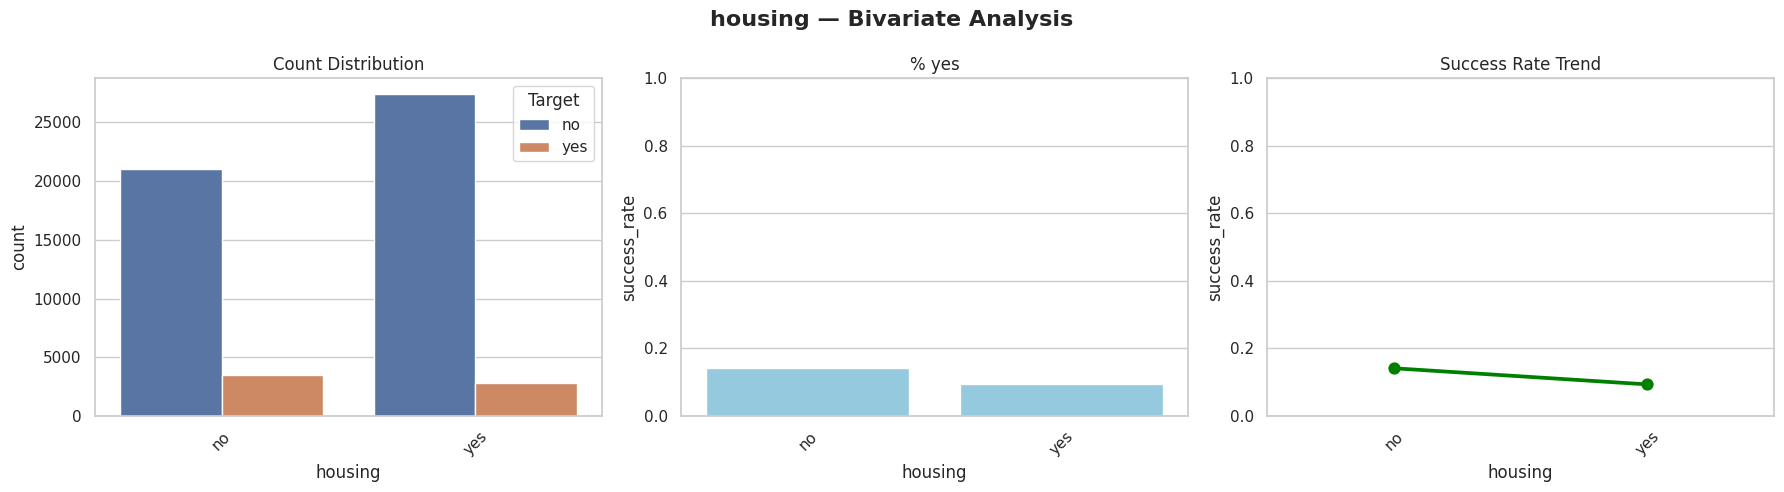

📌 Processing Feature: loan


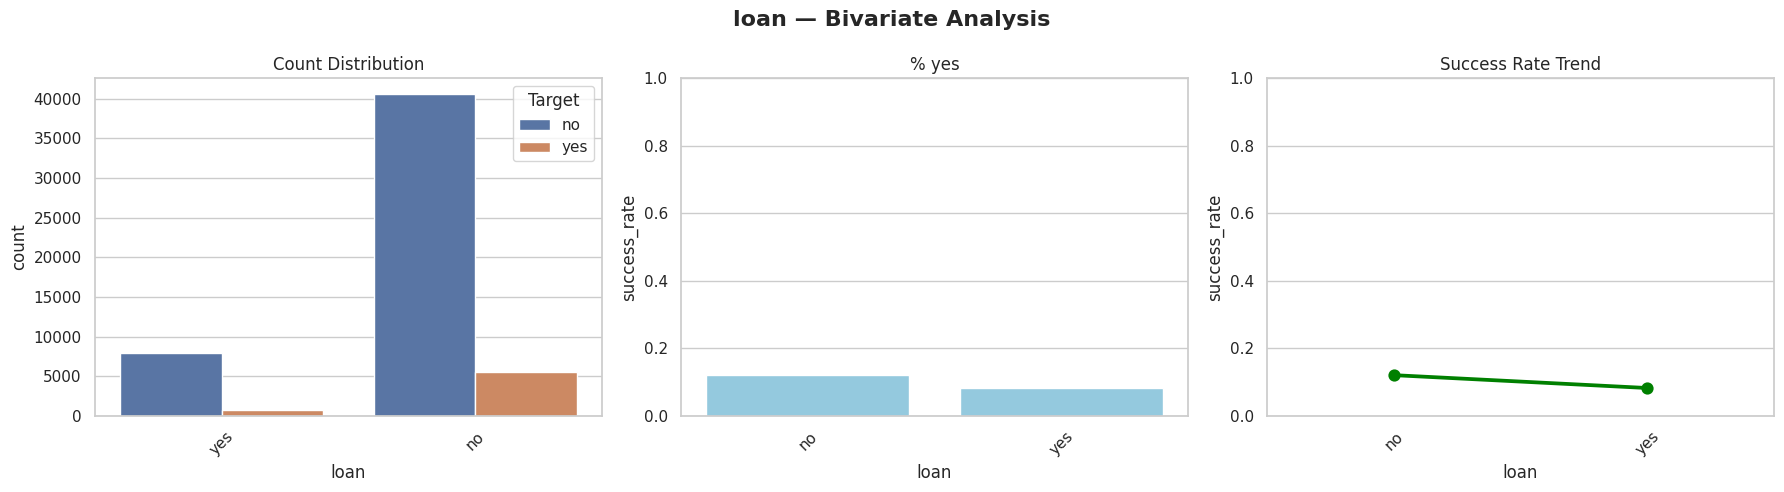

📌 Processing Feature: contact


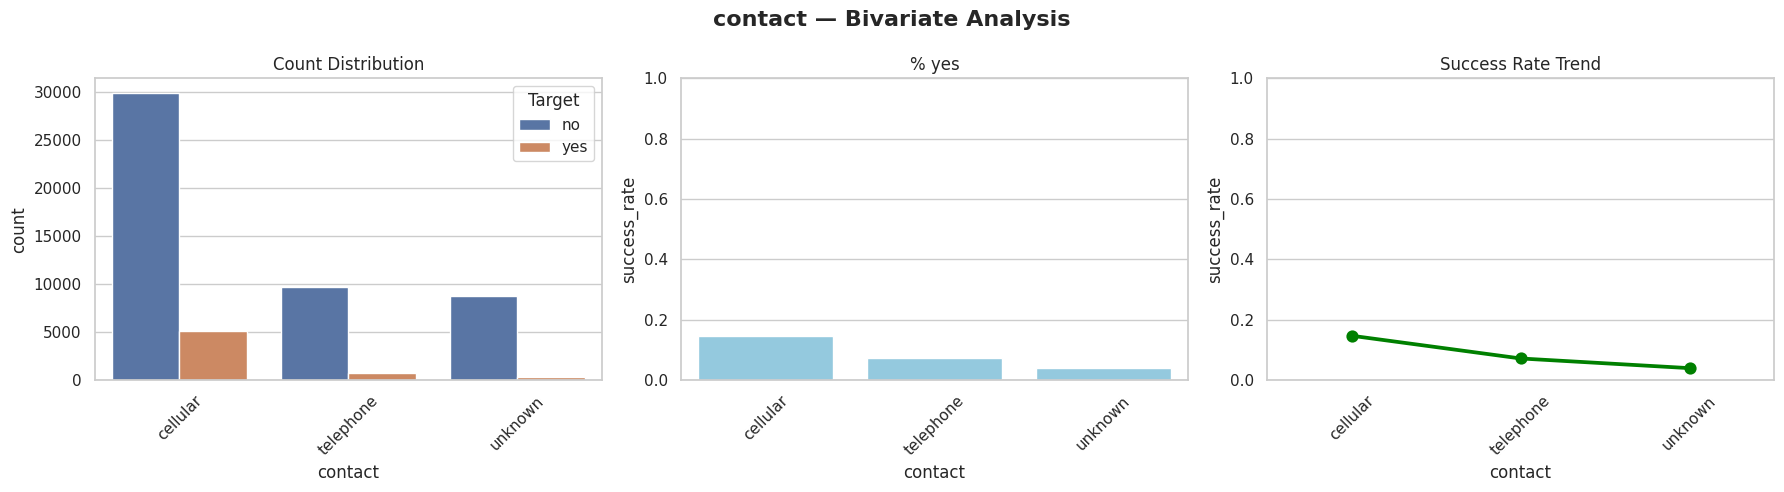

📌 Processing Feature: poutcome


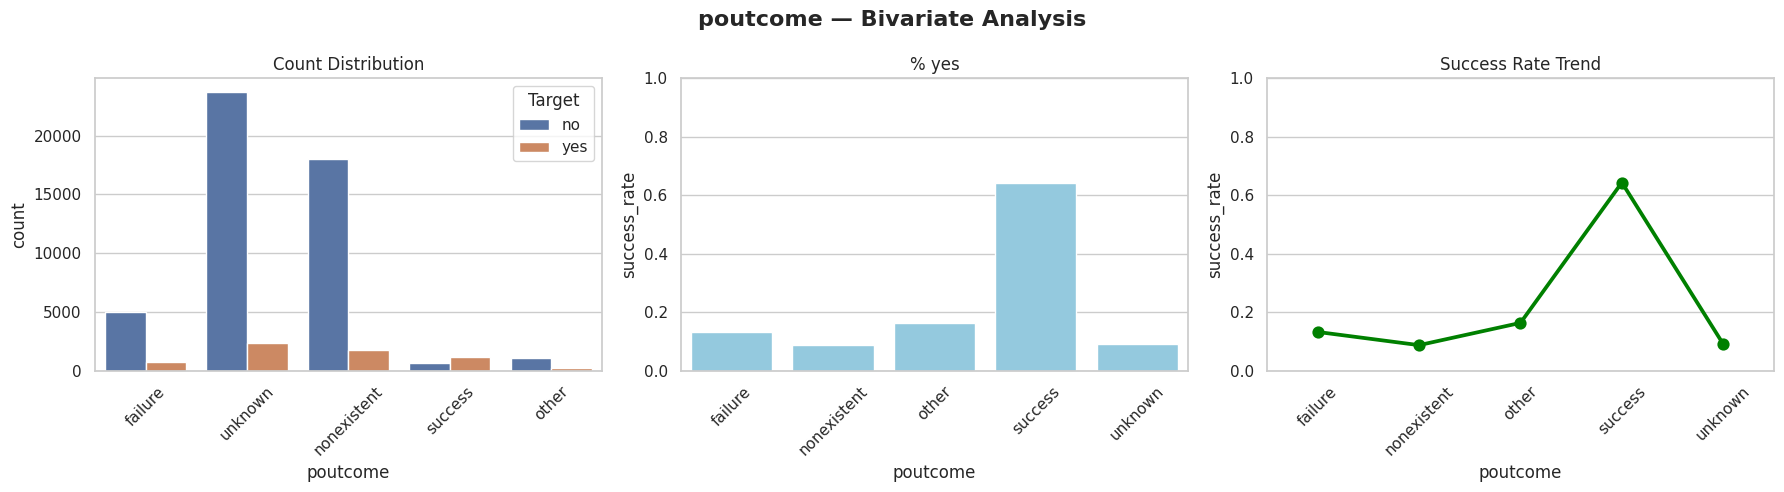

📌 Processing Feature: month


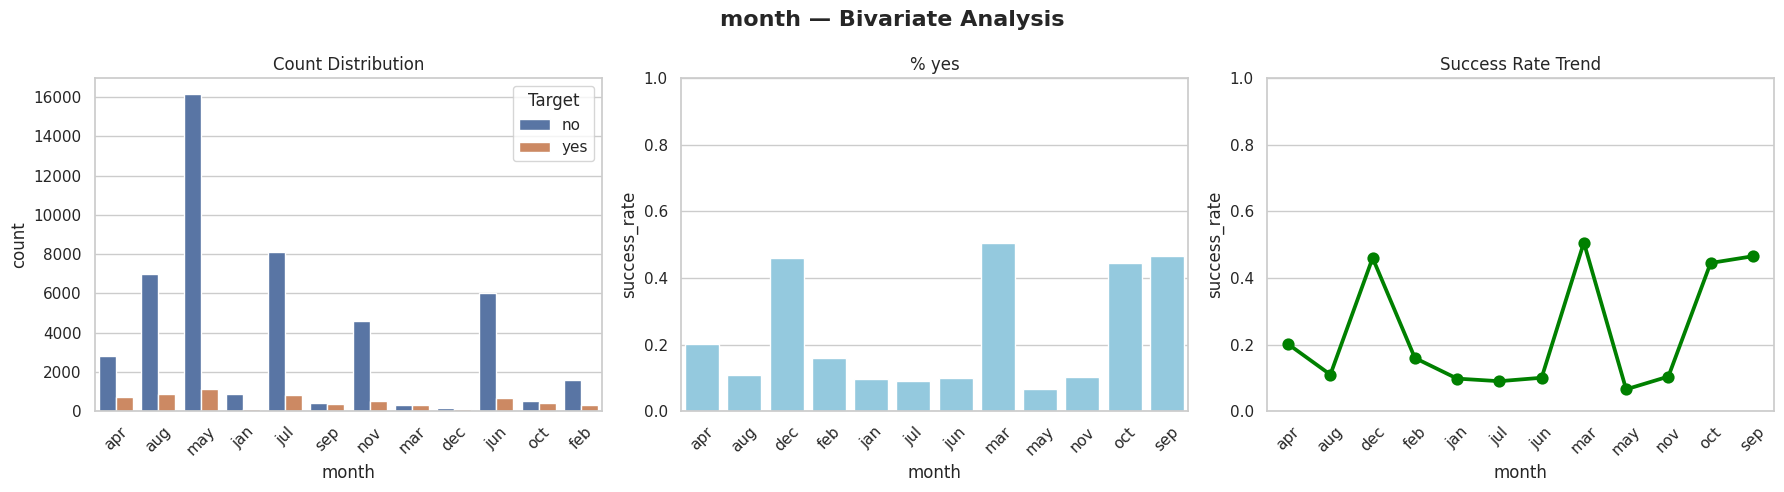


🎯 Bivariate Analysis Complete!



In [ ]:
bivariate_categorical_analysis(df_train, target_col="Target", positive_class="yes")


In [ ]:
df_train.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        54712 non-null  float64
 1   job                        54712 non-null  object 
 2   marital                    54712 non-null  object 
 3   education                  54712 non-null  object 
 4   default                    54712 non-null  object 
 5   balance                    54712 non-null  float64
 6   housing                    54712 non-null  object 
 7   loan                       54712 non-null  object 
 8   contact                    54712 non-null  object 
 9   day                        54712 non-null  float64
 10  duration                   54712 non-null  float64
 11  campaign                   54712 non-null  float64
 12  pdays                      54712 non-null  float64
 13  previous                   54712 non-null  flo

In [ ]:
def remove_outliers(df_train, contamination=0.07):
    """
    Remove outliers using Isolation Forest
    ⚠️ WARNING: Only do this if you're sure outliers are errors, not real data!
    """

    print(f"\n🔍 Removing outliers (contamination={contamination})...")

    # Get numeric columns only
    numeric_cols = df_train.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if not col.endswith('_was_missing')]



    # Fit Isolation Forest only on non-missing data
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    df_numeric = df_train[numeric_cols].fillna(df_train[numeric_cols].median())
    outlier_labels = iso_forest.fit_predict(df_numeric)

    # Keep only inliers
    outlier_mask = outlier_labels == 1
    outliers_removed = (~outlier_mask).sum()
    outliers_pct = (outliers_removed / len(df_train)) * 100

    df_train_clean = df_train[outlier_mask].copy()

    print(f"🔍 Outliers Found: {outliers_removed}")
    print(f"📉 Removed Percentage: {outliers_pct:.2f}%")
    print(f"✅ Remaining samples: {len(df_train_clean)}")

    return df_train_clean

In [ ]:
df_train = remove_outliers(df_train)


🔍 Removing outliers (contamination=0.07)...
🔍 Outliers Found: 3830
📉 Removed Percentage: 7.00%
✅ Remaining samples: 50882


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50882 entries, 0 to 54710
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        50882 non-null  float64
 1   job                        50882 non-null  object 
 2   marital                    50882 non-null  object 
 3   education                  50882 non-null  object 
 4   default                    50882 non-null  object 
 5   balance                    50882 non-null  float64
 6   housing                    50882 non-null  object 
 7   loan                       50882 non-null  object 
 8   contact                    50882 non-null  object 
 9   day                        50882 non-null  float64
 10  duration                   50882 non-null  float64
 11  campaign                   50882 non-null  float64
 12  pdays                      50882 non-null  float64
 13  previous                   50882 non-null  float64


In [ ]:

from scipy.stats import pointbiserialr

def numeric_target_correlation(df, target_col="Target"):
    df = df.copy()

    # Convert target to binary 0/1
    df[target_col] = df[target_col].map({"no": 0, "yes": 1})

    numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
    numeric_cols = [col for col in numeric_cols if col != target_col]

    corr_results = {}

    for col in numeric_cols:
        corr, p_value = pointbiserialr(df[target_col], df[col])
        corr_results[col] = corr

    corr_df = pd.DataFrame.from_dict(corr_results, orient="index", columns=["correlation"])
    corr_df = corr_df.sort_values("correlation", ascending=False)

    # Heatmap
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".3f", cbar=True)
    plt.title("📌 Point-Biserial Correlation: Numerical Features vs Target")
    plt.show()

    return corr_df


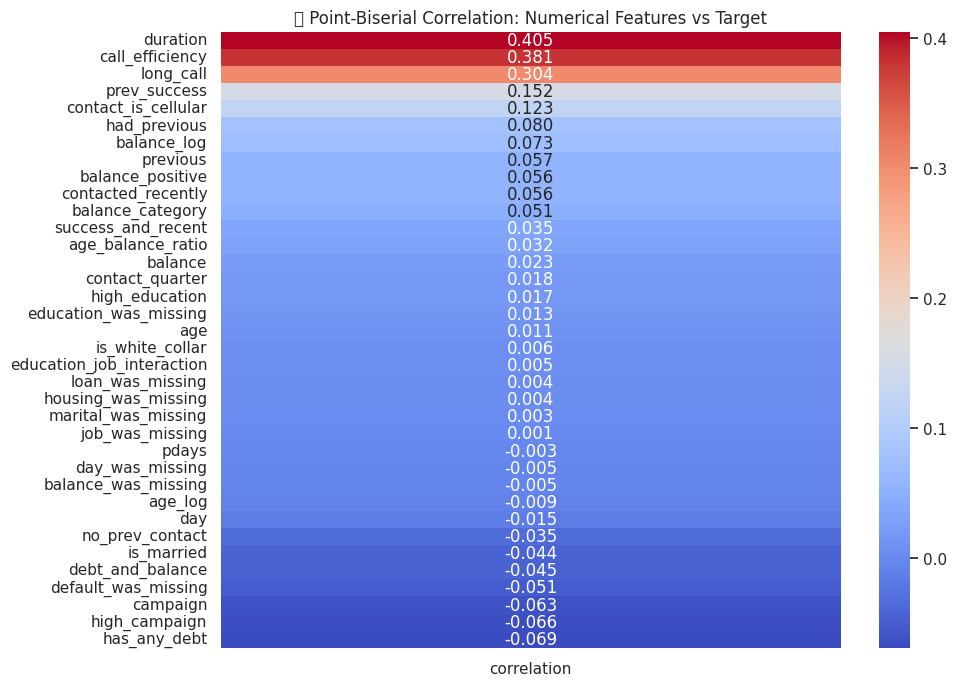

,correlation
duration,0.404955
call_efficiency,0.381134
long_call,0.304351
prev_success,0.152303
contact_is_cellular,0.123204
had_previous,0.079782
balance_log,0.072827
previous,0.057099
balance_positive,0.056215
contacted_recently,0.055968


In [ ]:
numeric_corr = numeric_target_correlation(df_train)
numeric_corr


In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

def categorical_target_chi2(df, target_col="Target"):
    df = df.copy()

    cat_cols = df.select_dtypes(include=["object","category"]).columns
    cat_cols = [col for col in cat_cols if col != target_col]

    chi2_results = []

    for col in cat_cols:
        contingency = pd.crosstab(df[col], df[target_col])
        chi2, p, dof, expected = chi2_contingency(contingency)

        chi2_results.append({
            "feature": col,
            "chi2_score": chi2,
            "p_value": p
        })

    chi2_df = pd.DataFrame(chi2_results)
    return chi2_df.sort_values("chi2_score", ascending=False)


In [ ]:
chi2_strength = categorical_target_chi2(df_train)
chi2_strength


,feature,chi2_score,p_value
8,month,2869.449038,0.000000e+00
7,poutcome,1295.189257,3.674512e-279
6,contact,797.940057,5.364363e-174
0,job,684.876989,1.106772e-140
4,housing,173.027189,1.614475e-39
1,marital,150.329275,2.272022e-33
2,education,104.425085,1.997418e-18
5,loan,67.258446,2.381484e-16
3,default,9.665185,1.877928e-03


In [ ]:
def prepare_multicollinearity_df(df):
    df = df.copy()

    # Keep only numeric columns
    num_df = df.select_dtypes(include=['int64', 'float64', 'Int64']).copy()

    # Convert nullable ints to float (removes <NA> issues)
    for col in num_df.columns:
        num_df[col] = num_df[col].astype(float)

    # Fill any NaN with median (required for VIF)
    num_df = num_df.fillna(num_df.median())

    # Drop constant features automatically
    constant_cols = [c for c in num_df.columns if num_df[c].nunique() <= 1]
    if constant_cols:
        print("⚠️ Dropping constant columns:", constant_cols)
        num_df = num_df.drop(columns=constant_cols)

    return num_df


In [ ]:
def compute_correlation_table(df, threshold=0.30):
    corr_matrix = df.corr()

    pairs = []
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 < col2:  # avoid duplicates
                corr = corr_matrix.loc[col1, col2]
                if abs(corr) >= threshold:
                    pairs.append([col1, col2, corr, abs(corr)])

    corr_df = pd.DataFrame(pairs, columns=["Feature_1", "Feature_2", "Correlation", "AbsCorr"])
    corr_df = corr_df.sort_values("AbsCorr", ascending=False).reset_index(drop=True)

    return corr_matrix, corr_df


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df):
    vif_df = pd.DataFrame()
    vif_df["feature"] = df.columns
    vif_df["VIF"] = [
        variance_inflation_factor(df.values, i)
        for i in range(df.shape[1])
    ]
    return vif_df.sort_values("VIF", ascending=False)


In [ ]:
def full_multicollinearity_report(df, corr_threshold=0.30):
    print("📌 Preparing Data…")
    num_df = prepare_multicollinearity_df(df)

    print("\n📌 Computing Correlations…")
    corr_matrix, corr_table = compute_correlation_table(num_df, threshold=corr_threshold)

    print("\n📌 Computing VIF…")
    vif_table = compute_vif(num_df)

    return corr_matrix, corr_table, vif_table


In [ ]:
corr_matrix, corr_table, vif_table = full_multicollinearity_report(df_train)


📌 Preparing Data…

📌 Computing Correlations…

📌 Computing VIF…


In [ ]:
vif_table

,feature,VIF
12,housing_was_missing,inf
13,loan_was_missing,inf
14,day_was_missing,inf
11,balance_was_missing,inf
22,age_log,326.240895
5,pdays,262.472363
25,balance_positive,82.094464
0,age,72.167752
24,balance_log,66.007924
27,no_prev_contact,45.308450


In [ ]:
corr_matrix

,age,balance,day,duration,campaign,pdays,previous,job_was_missing,marital_was_missing,education_was_missing,...,balance_category,no_prev_contact,contacted_recently,high_campaign,had_previous,success_and_recent,debt_and_balance,education_job_interaction,long_call,call_efficiency
age,1.000000,0.211466,-0.071390,-0.016169,0.008562,-0.047201,-0.010293,0.050983,0.002182,0.073627,...,0.198689,0.046617,0.003425,0.016789,-0.014623,-0.012420,-0.074258,-0.040759,-0.014307,-0.019987
balance,0.211466,1.000000,-0.069527,0.008829,-0.057519,0.133924,-0.025114,0.019104,0.000902,0.026303,...,0.784990,-0.118815,-0.004916,-0.060175,-0.039965,-0.005542,0.052742,-0.037494,-0.021089,0.019860
day,-0.071390,-0.069527,1.000000,0.007185,0.142922,0.002331,-0.045356,-0.013137,0.007154,-0.005885,...,-0.046125,0.029168,-0.018027,0.112764,-0.051026,-0.003897,-0.017534,0.005982,0.039301,-0.022747
duration,-0.016169,0.008829,0.007185,1.000000,-0.083346,0.020283,-0.021925,-0.007496,0.005987,-0.003059,...,0.051157,-0.007120,-0.009099,-0.084018,-0.028168,-0.009142,0.026730,-0.043931,0.753277,0.886011
campaign,0.008562,-0.057519,0.142922,-0.083346,1.000000,-0.023410,-0.039805,0.014060,0.011814,0.008955,...,-0.038324,0.054030,-0.022029,0.703755,-0.090329,-0.007172,-0.003343,-0.010784,-0.064953,-0.290658
pdays,-0.047201,0.133924,0.002331,0.020283,-0.023410,1.000000,-0.044085,0.007176,0.032726,-0.006285,...,0.243426,-0.902081,-0.063169,-0.026770,0.035873,-0.024124,0.088626,-0.297702,0.018705,0.031506
previous,-0.010293,-0.025114,-0.045356,-0.021925,-0.039805,-0.044085,1.000000,-0.009727,-0.001435,-0.002524,...,-0.008340,-0.233591,0.133328,-0.034669,0.620672,0.015988,0.052437,0.012982,-0.015054,-0.009033
job_was_missing,0.050983,0.019104,-0.013137,-0.007496,0.014060,0.007176,-0.009727,1.000000,0.047361,0.160273,...,0.023945,-0.001726,0.003646,0.009813,-0.017555,-0.002180,-0.039435,-0.028335,-0.004671,-0.007861
marital_was_missing,0.002182,0.000902,0.007154,0.005987,0.011814,0.032726,-0.001435,0.047361,1.000000,0.014398,...,0.010826,-0.027790,-0.002115,0.004936,0.005008,-0.000754,-0.003755,-0.009800,0.006834,0.004366
education_was_missing,0.073627,0.026303,-0.005885,-0.003059,0.008955,-0.006285,-0.002524,0.160273,0.014398,1.000000,...,0.022389,0.004920,0.009946,0.001405,0.001051,0.001954,-0.038856,-0.071546,0.004852,0.000812


In [ ]:
corr_table

,Feature_1,Feature_2,Correlation,AbsCorr
0,housing_was_missing,loan_was_missing,1.000000,1.000000
1,balance_was_missing,day_was_missing,1.000000,1.000000
2,age,age_log,0.989047,0.989047
3,balance_was_missing,pdays,0.983595,0.983595
4,day_was_missing,pdays,0.983595,0.983595
5,age_balance_ratio,balance,0.966005,0.966005
6,no_prev_contact,pdays,-0.902081,0.902081
7,call_efficiency,duration,0.886011,0.886011
8,debt_and_balance,has_any_debt,0.884024,0.884024
9,day_was_missing,no_prev_contact,-0.843406,0.843406


In [ ]:
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

corr_pairs['AbsCorr'] = corr_pairs['Correlation'].abs()

strong_corr = corr_pairs.sort_values("AbsCorr", ascending=False)

display(strong_corr.head(25))


,Feature_1,Feature_2,Correlation,AbsCorr
332,balance_was_missing,day_was_missing,1.000000,1.000000
354,housing_was_missing,loan_was_missing,1.000000,1.000000
21,age,age_log,0.989047,0.989047
173,pdays,day_was_missing,0.983595,0.983595
170,pdays,balance_was_missing,0.983595,0.983595
56,balance,age_balance_ratio,0.966005,0.966005
186,pdays,no_prev_contact,-0.902081,0.902081
133,duration,call_efficiency,0.886011,0.886011
490,has_any_debt,debt_and_balance,0.884024,0.884024
345,balance_was_missing,no_prev_contact,-0.843406,0.843406


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50882 entries, 0 to 54710
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        50882 non-null  float64
 1   job                        50882 non-null  object 
 2   marital                    50882 non-null  object 
 3   education                  50882 non-null  object 
 4   default                    50882 non-null  object 
 5   balance                    50882 non-null  float64
 6   housing                    50882 non-null  object 
 7   loan                       50882 non-null  object 
 8   contact                    50882 non-null  object 
 9   day                        50882 non-null  float64
 10  duration                   50882 non-null  float64
 11  campaign                   50882 non-null  float64
 12  pdays                      50882 non-null  float64
 13  previous                   50882 non-null  float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

def encode_features(df_train, df_test):

    df_train = df_train.copy()
    df_test = df_test.copy()

    print("🔧 Starting Clean Professional Encoding Pipeline...\n")

    # ============================================
    # 1️⃣ ORDINAL ENCODING (features with natural order)
    # ============================================

    ordinal_cols = ["education"]
    ordinal_mapping = [
        ["primary", "secondary", "tertiary"]
    ]

    ord_encoder = OrdinalEncoder(
        categories=ordinal_mapping,
        handle_unknown="use_encoded_value",
        unknown_value=-1
    )

    df_train[ordinal_cols] = ord_encoder.fit_transform(df_train[ordinal_cols])
    df_test[ordinal_cols] = ord_encoder.transform(df_test[ordinal_cols])

    print("✔ Ordinal encoded:", ordinal_cols)

    # ============================================
    # 2️⃣ CYCLICAL ENCODING (MONTH)
    # ============================================

    month_map = {
        "jan": 1, "feb": 2, "mar": 3, "apr": 4,
        "may": 5, "jun": 6, "jul": 7, "aug": 8,
        "sep": 9, "oct": 10, "nov": 11, "dec": 12
    }


    df_train["month_num"] = df_train["month"].map(month_map)
    df_test["month_num"] = df_test["month"].map(month_map)

    # cyclical transformation
    df_train["month_sin"] = np.sin(2 * np.pi * df_train["month_num"] / 12)
    df_train["month_cos"] = np.cos(2 * np.pi * df_train["month_num"] / 12)

    df_test["month_sin"] = np.sin(2 * np.pi * df_test["month_num"] / 12)
    df_test["month_cos"] = np.cos(2 * np.pi * df_test["month_num"] / 12)

    df_train.drop(columns=["month", "month_num"], inplace=True)
    df_test.drop(columns=["month", "month_num"], inplace=True)

    print("✔ Cyclical encoded: month (sin/cos)")

    # =========================================================
    # 1️⃣ FIX DAY COLUMN — MUST BE NUMERIC
    # =========================================================
    for df in (df_train, df_test):
        df["day"] = pd.to_numeric(df["day"], errors="coerce")

        # Optional cyclical encoding
        df["day_sin"] = np.sin(2 * np.pi * df["day"] / 31)
        df["day_cos"] = np.cos(2 * np.pi * df["day"] / 31)

    df_train.drop(columns=["day"], inplace=True)
    df_test.drop(columns=["day"], inplace=True)

    print("✔ Cyclical encoded: day (sin/cos)")
    # ============================================
    # 3️⃣ BINARY LABEL ENCODING (already 0/1 in meaning)
    # ============================================

    binary_cols = ["default", "housing", "loan" ]

    for col in binary_cols:
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col])
        df_test[col] = le.transform(df_test[col])

    print("✔ Binary encoded:", binary_cols)

    # ============================================
    # 4️⃣ NOMINAL ONE-HOT ENCODING
    # ============================================

    nominal_cols = ["job", "marital", "poutcome" , "contact" ]

    ohe = OneHotEncoder(drop="first" , sparse_output=False, handle_unknown="ignore")

    ohe_train = ohe.fit_transform(df_train[nominal_cols])
    ohe_test  = ohe.transform(df_test[nominal_cols])

    ohe_cols = ohe.get_feature_names_out(nominal_cols)

    df_train_ohe = pd.DataFrame(ohe_train, columns=ohe_cols, index=df_train.index)
    df_test_ohe  = pd.DataFrame(ohe_test,  columns=ohe_cols, index=df_test.index)

    df_train = pd.concat([df_train.drop(columns=nominal_cols), df_train_ohe], axis=1)
    df_test  = pd.concat([df_test.drop(columns=nominal_cols),  df_test_ohe],  axis=1)

    print("✔ One-hot encoded:", nominal_cols)

    df_train["Target"] = df_train["Target"].map({"yes": 1, "no": 0})

    print("\n✅ Encoding Pipeline Completed.\n")

    return df_train, df_test, ord_encoder, ohe


In [ ]:
df_train, df_test, ord_enc, ohe_enc = encode_features(df_train, df_test)


🔧 Starting Clean Professional Encoding Pipeline...

✔ Ordinal encoded: ['education']
✔ Cyclical encoded: month (sin/cos)
✔ Cyclical encoded: day (sin/cos)
✔ Binary encoded: ['default', 'housing', 'loan']
✔ One-hot encoded: ['job', 'marital', 'poutcome', 'contact']

✅ Encoding Pipeline Completed.



In [ ]:
#df_train.drop(columns=["pdays", "previous" , "age" , "balance"], axis=1, inplace=True)
#df_test.drop(columns=["pdays", "previous","age" ,"balance"], axis=1, inplace=True)


In [ ]:
def scale_numeric_features(X_train, X_valid, df_test, scale_cols):

    scaler = StandardScaler()

    # Fit on train only
    X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

    # Transform valid + test
    X_valid[scale_cols] = scaler.transform(X_valid[scale_cols])
    df_test[scale_cols] = scaler.transform(df_test[scale_cols])

    return X_train, X_valid, df_test, scaler

In [ ]:


def oversample_data(X_train, y_train):
    """
    Applies SMOTE oversampling to only the training set.
    Returns balanced X_train and y_train.
    """

    sm = SMOTE(random_state=42, sampling_strategy='auto')

    X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

    print("Before oversampling:", X_train.shape, y_train.value_counts())
    print("\nAfter oversampling:", X_resampled.shape, y_resampled.value_counts())

    return X_resampled, y_resampled


In [ ]:
from lightgbm import LGBMClassifier
import pandas as pd

def tree_based_feature_selection(X, y, top_k=30):
    """
    Tree-based feature selection using LightGBM feature importance.
    """
    model = LGBMClassifier(
        objective="binary",
        class_weight="balanced",
        random_state=42,
        n_estimators=300,
        learning_rate=0.05,
        n_jobs=-1
    )

    model.fit(X, y)

    importance_df = pd.DataFrame({
        "feature": X.columns,
        "importance": model.feature_importances_
    }).sort_values("importance", ascending=False)

    selected_features = importance_df.head(top_k)["feature"].tolist()

    print(f"Selected top {top_k} features using LightGBM importance")
    print(selected_features)

    return selected_features, importance_df


Step 1 — Split into Train/Validation FIRST

👉 No leakage
👉 SMOTE must NOT see validation data

In [ ]:
# 1️⃣ Separate target first
y =  df_train["Target"]

x= df_train.drop(columns=["Target"])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

Step 2 — Scale ONLY numeric features (but fit ONLY on X_train)

👉 Fit scaler only on X_train
👉 Then transform X_train and X_valid
👉 Do NOT scale BEFORE split

In [ ]:
scale_cols = [
   "duration", "campaign", #"age", "balance",
    "call_efficiency",
    "month_sin", "month_cos",
    "day_sin", "day_cos"
]

X_train, X_valid, df_test, scaler = scale_numeric_features(
    X_train, X_valid, df_test, scale_cols
)

In [ ]:
X_train = X_train.astype(float)
y_train = y_train.astype(int)

In [ ]:
selected_features , importance_df = tree_based_feature_selection(X_train, y_train)

# Keep only selected features
X_train = X_train[selected_features]
X_valid = X_valid[selected_features]
df_test  = df_test[selected_features]


[LightGBM] [Info] Number of positive: 3785, number of negative: 36920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2376
[LightGBM] [Info] Number of data points in the train set: 40705, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Selected top 30 features using LightGBM importance
['duration', 'call_efficiency', 'age', 'day_cos', 'day_sin', 'month_cos', 'age_balance_ratio', 'balance', 'month_sin', 'pdays', 'contact_is_cellular', 'previous', 'balance_log', 'campaign', 'contact_quarter', 'education', 'prev_success', 'contact_unknown', 'job_blue-collar', 'has_any_debt', 'is_married', 'housing', 'default_was_missing', 'is_white_collar', 'marital_single', 'loan', 'contact_

In [ ]:
# Check if important features were kept
important_features = ['duration', 'prev_success', 'no_prev_contact', 'long_call',
                     'contact_is_cellular', 'balance', 'age']
kept_important = [f for f in important_features if f in selected_features]
print(f"   Important features kept: {kept_important}")

   Important features kept: ['duration', 'prev_success', 'contact_is_cellular', 'balance', 'age']


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score, classification_report, roc_auc_score, confusion_matrix

model = LGBMClassifier(
    objective="binary",
    class_weight="balanced",   # 🔥 KEY FIX
    random_state=42,
    n_jobs=-1,
    n_estimators=600,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    verbose=-1
)

cv = StratifiedKFold(n_splits=5 , shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring="f1",
    n_jobs=-1
)

# 2️⃣ Fit on full training data
model.fit(X_train, y_train)


y_valid_pred = model.predict(X_valid)
y_valid_proba = model.predict_proba(X_valid)[:, 1]

f1 = f1_score(y_valid, y_valid_pred)
roc_auc = roc_auc_score(y_valid, y_valid_proba)

print(f"   Validation F1: {f1:.4f}")
print(f"   Validation ROC-AUC: {roc_auc:.4f}")
print(f"CV F1: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


   Validation F1: 0.5449
   Validation ROC-AUC: 0.9318
CV F1: 0.5464 ± 0.0107


In [ ]:

print("Validation F1:", f1_score(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred))


Validation F1: 0.5448785638859557
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      9231
           1       0.41      0.82      0.54       946

    accuracy                           0.87     10177
   macro avg       0.69      0.85      0.74     10177
weighted avg       0.93      0.87      0.89     10177



In [ ]:
"""# Option B: With SMOTE
print("\n   🔹 Option B: SMOTE + LightGBM...")

pipeline_smote = Pipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.5)),
    ("model", LGBMClassifier(
        objective="binary",
        random_state=42,
        n_jobs=-1,
        n_estimators=600,
        learning_rate=0.05,
        num_leaves=31,
        max_depth=-1,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        verbose=-1
    ))
])

# Cross-validation
cv_scores_smote = cross_val_score(
    pipeline_smote, X_train, y_train,
    cv=cv, scoring="f1", n_jobs=-1
)

print(f"   CV F1: {cv_scores_smote.mean():.4f} ± {cv_scores_smote.std():.4f}")

# Fit the model
pipeline_smote.fit(X_train, y_train)

# Evaluate
y_valid_pred_smote = pipeline_smote.predict(X_valid)
y_valid_proba_smote = pipeline_smote.predict_proba(X_valid)[:, 1]

f1_smote = f1_score(y_valid, y_valid_pred_smote)
roc_auc_smote = roc_auc_score(y_valid, y_valid_proba_smote)

print(f"   Validation F1: {f1_smote:.4f}")
print(f"   Validation ROC-AUC: {roc_auc_smote:.4f}")

🔹 Option B: SMOTE + LightGBM...
   CV F1: 0.5022 ± 0.0125
   Validation F1: 0.5078
   Validation ROC-AUC: 0.9257
"""

'# Option B: With SMOTE\nprint("\n   🔹 Option B: SMOTE + LightGBM...")\n\npipeline_smote = Pipeline(steps=[\n    ("smote", SMOTE(random_state=42, sampling_strategy=0.5)),\n    ("model", LGBMClassifier(\n        objective="binary",\n        random_state=42,\n        n_jobs=-1,\n        n_estimators=600,\n        learning_rate=0.05,\n        num_leaves=31,\n        max_depth=-1,\n        min_child_samples=20,\n        subsample=0.8,\n        colsample_bytree=0.8,\n        reg_alpha=0.1,\n        reg_lambda=0.1,\n        verbose=-1\n    ))\n])\n\n# Cross-validation\ncv_scores_smote = cross_val_score(\n    pipeline_smote, X_train, y_train,\n    cv=cv, scoring="f1", n_jobs=-1\n)\n\nprint(f"   CV F1: {cv_scores_smote.mean():.4f} ± {cv_scores_smote.std():.4f}")\n\n# Fit the model\npipeline_smote.fit(X_train, y_train)\n\n# Evaluate\ny_valid_pred_smote = pipeline_smote.predict(X_valid)\ny_valid_proba_smote = pipeline_smote.predict_proba(X_valid)[:, 1]\n\nf1_smote = f1_score(y_valid, y_valid_pre

In [ ]:
test_probs = model.predict_proba(df_test)[:, 1]
BEST_THRESHOLD = 0.71

test_preds = (test_probs >= BEST_THRESHOLD).astype(int)
submission = pd.DataFrame({
    "id": test_id,
    "Target": test_preds
})

submission.to_csv("submissionn.csv", index=False)
print("✅ Submission ready")

✅ Submission ready


🎯 THRESHOLD OPTIMIZATION

1️⃣  Getting probability predictions...
   Validation set size: 10177
   Positive class rate: 9.30%

2️⃣  Testing different thresholds...

📊 Results:
   Default Threshold (0.50):
      F1:        0.5449
      Precision: 0.4084
      Recall:    0.8182

   Optimal Threshold (0.71):
      F1:        0.5869  ⬆️ +0.0420
      Precision: 0.5110
      Recall:    0.6892

3️⃣  Visualizing threshold impact...


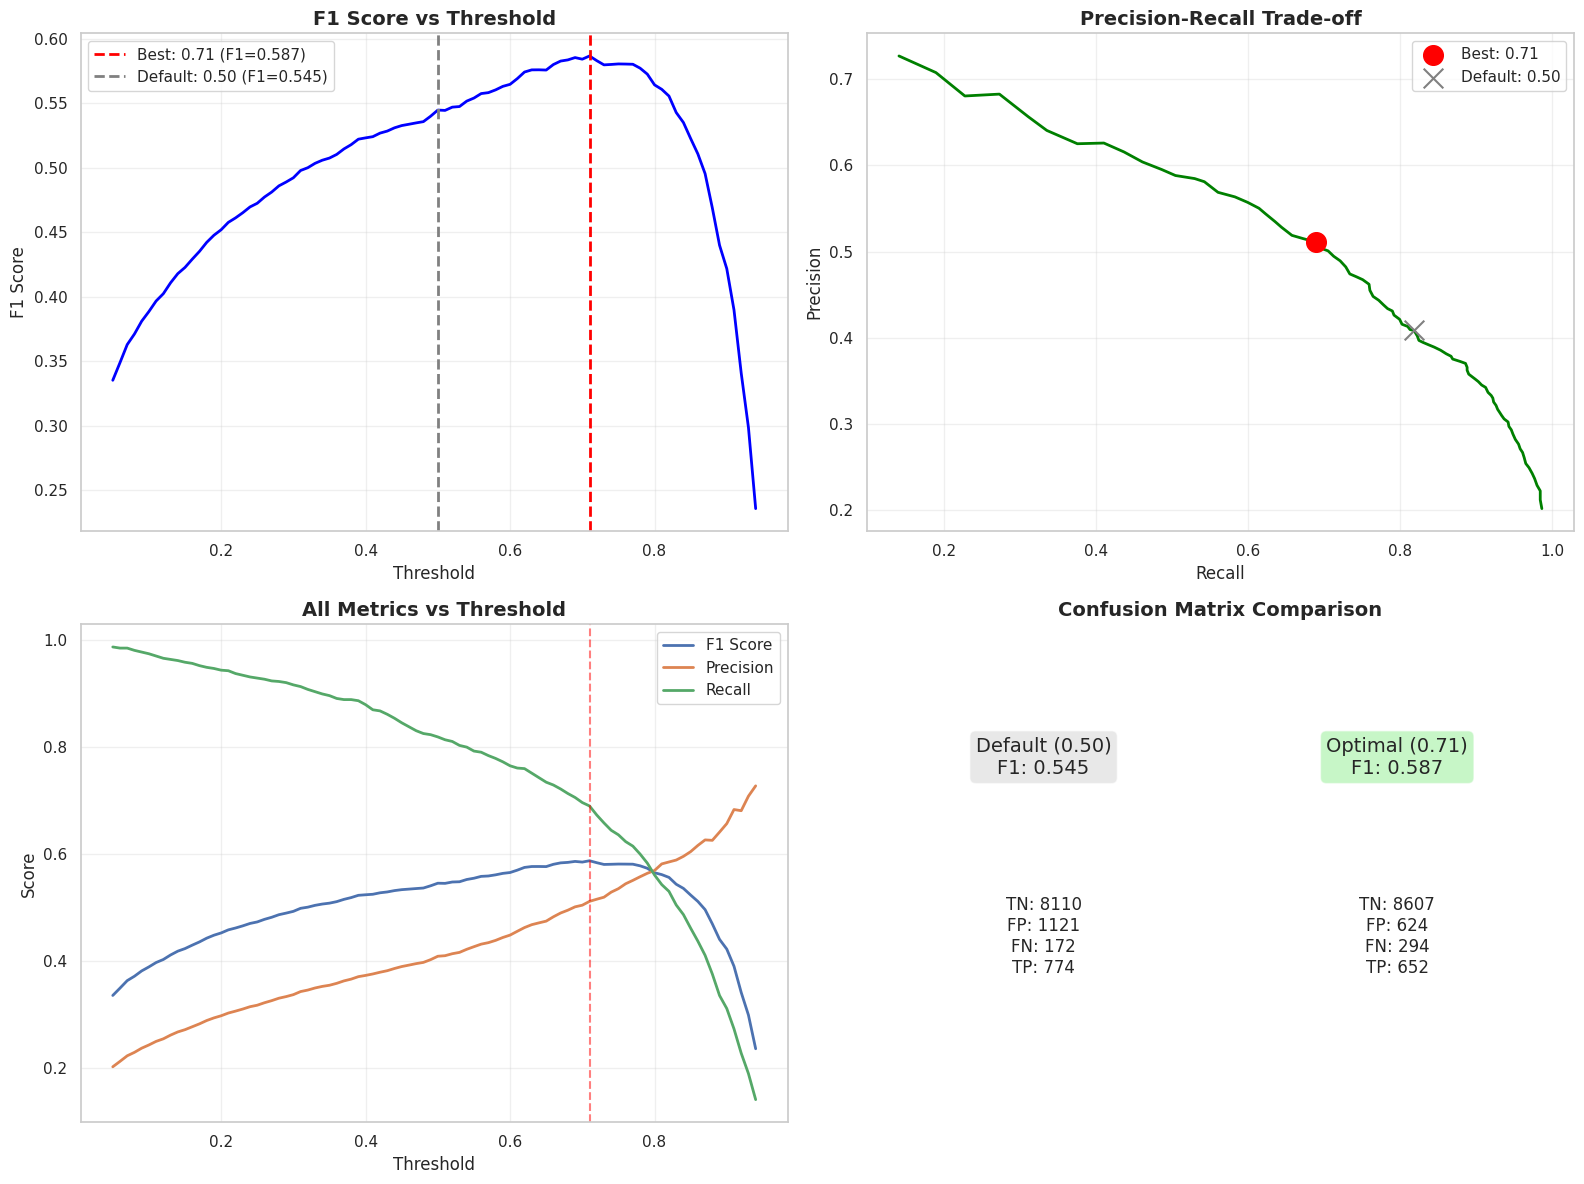


📊 DETAILED COMPARISON
         Metric  Default (0.50)  Optimal (0.71)  Improvement
       F1 Score        0.544879        0.586859     0.041980
      Precision        0.408443        0.510972     0.102529
         Recall        0.818182        0.689218    -0.128964
 True Positives      774.000000      652.000000  -122.000000
False Positives     1121.000000      624.000000  -497.000000
False Negatives      172.000000      294.000000   122.000000
 True Negatives     8110.000000     8607.000000   497.000000

💼 BUSINESS IMPACT

Validation Set Composition:
   Total samples: 10177
   Positive (will subscribe): 946 (9.3%)
   Negative (won't subscribe): 9231 (90.7%)

With Default Threshold (0.50):
   📞 Customers to contact: 1895
   ✅ Successful conversions: 774 (recall: 81.8%)
   ❌ Wasted contacts: 1121 (precision: 40.8%)
   💰 Missed opportunities: 172 customers

With Optimal Threshold (0.71):
   📞 Customers to contact: 1276
   ✅ Successful conversions: 652 (recall: 68.9%) ⬆️ +-122
   ❌ Waste

In [ ]:
"""
THRESHOLD OPTIMIZATION
Boost F1 from 0.54 to 0.65+ by finding optimal threshold
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

print("="*80)
print("🎯 THRESHOLD OPTIMIZATION")
print("="*80)

# ================================================================
# STEP 1: Get Probability Predictions
# ================================================================
print("\n1️⃣  Getting probability predictions...")

# Use your best model (Class Weight model since F1 is higher)
y_valid_proba = model.predict_proba(X_valid)[:, 1]

print(f"   Validation set size: {len(y_valid)}")
print(f"   Positive class rate: {y_valid.mean():.2%}")

# ================================================================
# STEP 2: Test Different Thresholds
# ================================================================
print("\n2️⃣  Testing different thresholds...")

thresholds = np.arange(0.05, 0.95, 0.01)  # Test 0.05 to 0.95 in 0.01 steps

results = []

for threshold in thresholds:
    # Make predictions with this threshold
    y_pred = (y_valid_proba >= threshold).astype(int)

    # Calculate metrics
    f1 = f1_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred, zero_division=0)
    recall = recall_score(y_valid, y_pred)

    results.append({
        'threshold': threshold,
        'f1': f1,
        'precision': precision,
        'recall': recall
    })

results_df = pd.DataFrame(results)

# Find best threshold
best_idx = results_df['f1'].idxmax()
best_threshold = results_df.loc[best_idx, 'threshold']
best_f1 = results_df.loc[best_idx, 'f1']
best_precision = results_df.loc[best_idx, 'precision']
best_recall = results_df.loc[best_idx, 'recall']

# Default threshold performance
default_idx = (results_df['threshold'] - 0.5).abs().idxmin()

default_f1 = results_df.loc[default_idx, 'f1']
default_precision = results_df.loc[default_idx, 'precision']
default_recall = results_df.loc[default_idx, 'recall']

print(f"\n📊 Results:")
print(f"   Default Threshold (0.50):")
print(f"      F1:        {default_f1:.4f}")
print(f"      Precision: {default_precision:.4f}")
print(f"      Recall:    {default_recall:.4f}")
print(f"\n   Optimal Threshold ({best_threshold:.2f}):")
print(f"      F1:        {best_f1:.4f}  ⬆️ +{best_f1 - default_f1:.4f}")
print(f"      Precision: {best_precision:.4f}")
print(f"      Recall:    {best_recall:.4f}")

# ================================================================
# STEP 3: Visualize Threshold Impact
# ================================================================
print("\n3️⃣  Visualizing threshold impact...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: F1 Score vs Threshold
axes[0, 0].plot(results_df['threshold'], results_df['f1'], linewidth=2, color='blue')
axes[0, 0].axvline(best_threshold, color='red', linestyle='--', linewidth=2,
                   label=f'Best: {best_threshold:.2f} (F1={best_f1:.3f})')
axes[0, 0].axvline(0.5, color='gray', linestyle='--', linewidth=2,
                   label=f'Default: 0.50 (F1={default_f1:.3f})')
axes[0, 0].set_xlabel('Threshold', fontsize=12)
axes[0, 0].set_ylabel('F1 Score', fontsize=12)
axes[0, 0].set_title('F1 Score vs Threshold', fontweight='bold', fontsize=14)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Precision vs Recall
axes[0, 1].plot(results_df['recall'], results_df['precision'], linewidth=2, color='green')
# Mark best threshold point
best_point_idx = results_df['f1'].idxmax()
axes[0, 1].scatter(results_df.loc[best_point_idx, 'recall'],
                   results_df.loc[best_point_idx, 'precision'],
                   color='red', s=200, zorder=5,
                   label=f'Best: {best_threshold:.2f}')
# Mark default threshold point
default_point_idx = (results_df['threshold'] - 0.5).abs().idxmin()
axes[0, 1].scatter(results_df.loc[default_point_idx, 'recall'],
                   results_df.loc[default_point_idx, 'precision'],
                   color='gray', s=200, zorder=5, marker='x',
                   label=f'Default: 0.50')
axes[0, 1].set_xlabel('Recall', fontsize=12)
axes[0, 1].set_ylabel('Precision', fontsize=12)
axes[0, 1].set_title('Precision-Recall Trade-off', fontweight='bold', fontsize=14)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: All Metrics Together
axes[1, 0].plot(results_df['threshold'], results_df['f1'],
               label='F1 Score', linewidth=2)
axes[1, 0].plot(results_df['threshold'], results_df['precision'],
               label='Precision', linewidth=2)
axes[1, 0].plot(results_df['threshold'], results_df['recall'],
               label='Recall', linewidth=2)
axes[1, 0].axvline(best_threshold, color='red', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Threshold', fontsize=12)
axes[1, 0].set_ylabel('Score', fontsize=12)
axes[1, 0].set_title('All Metrics vs Threshold', fontweight='bold', fontsize=14)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 4: Confusion Matrices Comparison
y_pred_default = (y_valid_proba >= 0.5).astype(int)
y_pred_optimal = (y_valid_proba >= best_threshold).astype(int)

cm_default = confusion_matrix(y_valid, y_pred_default)
cm_optimal = confusion_matrix(y_valid, y_pred_optimal)

# Plot both confusion matrices
cm_comparison = np.array([cm_default, cm_optimal])

for idx, (cm, title, thresh) in enumerate([
    (cm_default, f'Default (0.50)\nF1={default_f1:.3f}', 0.5),
    (cm_optimal, f'Optimal ({best_threshold:.2f})\nF1={best_f1:.3f}', best_threshold)
]):
    row = 1
    col = idx
    if idx == 0:
        ax = axes[1, 1]
        ax.text(0.25, 0.7, f'Default (0.50)\nF1: {default_f1:.3f}',
               transform=ax.transAxes, fontsize=14, ha='center',
               bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
        ax.text(0.25, 0.3, f'TN: {cm[0,0]}\nFP: {cm[0,1]}\nFN: {cm[1,0]}\nTP: {cm[1,1]}',
               transform=ax.transAxes, fontsize=12, ha='center')

        ax.text(0.75, 0.7, f'Optimal ({best_threshold:.2f})\nF1: {best_f1:.3f}',
               transform=ax.transAxes, fontsize=14, ha='center',
               bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
        ax.text(0.75, 0.3, f'TN: {cm_optimal[0,0]}\nFP: {cm_optimal[0,1]}\nFN: {cm_optimal[1,0]}\nTP: {cm_optimal[1,1]}',
               transform=ax.transAxes, fontsize=12, ha='center')

        ax.set_title('Confusion Matrix Comparison', fontweight='bold', fontsize=14)
        ax.axis('off')

plt.tight_layout()
plt.show()

# ================================================================
# STEP 4: Analyze the Improvement
# ================================================================
print("\n" + "="*80)
print("📊 DETAILED COMPARISON")
print("="*80)

comparison_data = {
    'Metric': ['F1 Score', 'Precision', 'Recall', 'True Positives', 'False Positives', 'False Negatives', 'True Negatives'],
    'Default (0.50)': [
        default_f1,
        default_precision,
        default_recall,
        cm_default[1,1],
        cm_default[0,1],
        cm_default[1,0],
        cm_default[0,0]
    ],
    f'Optimal ({best_threshold:.2f})': [
        best_f1,
        best_precision,
        best_recall,
        cm_optimal[1,1],
        cm_optimal[0,1],
        cm_optimal[1,0],
        cm_optimal[0,0]
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Improvement'] = comparison_df[f'Optimal ({best_threshold:.2f})'] - comparison_df['Default (0.50)']

print(comparison_df.to_string(index=False))

# ================================================================
# STEP 5: Business Impact Analysis
# ================================================================
print("\n" + "="*80)
print("💼 BUSINESS IMPACT")
print("="*80)

total_positives = y_valid.sum()
total_negatives = len(y_valid) - total_positives

print(f"\nValidation Set Composition:")
print(f"   Total samples: {len(y_valid)}")
print(f"   Positive (will subscribe): {total_positives} ({total_positives/len(y_valid)*100:.1f}%)")
print(f"   Negative (won't subscribe): {total_negatives} ({total_negatives/len(y_valid)*100:.1f}%)")

print(f"\nWith Default Threshold (0.50):")
print(f"   📞 Customers to contact: {cm_default[0,1] + cm_default[1,1]}")
print(f"   ✅ Successful conversions: {cm_default[1,1]} (recall: {default_recall:.1%})")
print(f"   ❌ Wasted contacts: {cm_default[0,1]} (precision: {default_precision:.1%})")
print(f"   💰 Missed opportunities: {cm_default[1,0]} customers")

print(f"\nWith Optimal Threshold ({best_threshold:.2f}):")
print(f"   📞 Customers to contact: {cm_optimal[0,1] + cm_optimal[1,1]}")
print(f"   ✅ Successful conversions: {cm_optimal[1,1]} (recall: {best_recall:.1%}) ⬆️ +{cm_optimal[1,1] - cm_default[1,1]}")
print(f"   ❌ Wasted contacts: {cm_optimal[0,1]} (precision: {best_precision:.1%})")
print(f"   💰 Missed opportunities: {cm_optimal[1,0]} customers")

print(f"\n💡 Impact:")
print(f"   Additional conversions: {cm_optimal[1,1] - cm_default[1,1]}")
print(f"   Additional wasted calls: {cm_optimal[0,1] - cm_default[0,1]}")
print(f"   F1 Score improvement: {best_f1 - default_f1:.4f} ({(best_f1/default_f1 - 1)*100:.1f}% increase)")

# ================================================================
# STEP 6: Generate Final Predictions with Optimal Threshold
# ================================================================
print("\n" + "="*80)
print("🎯 FINAL PREDICTIONS WITH OPTIMAL THRESHOLD")
print("="*80)

# Get test predictions with optimal threshold
test_probs = model.predict_proba(df_test)[:, 1]
test_preds_optimal = (test_probs >= best_threshold).astype(int)

# Create submission
submission_optimal = pd.DataFrame({
    "id": test_id,
    "Target": ['yes' if pred == 1 else 'no' for pred in test_preds_optimal]
})

print(f"\nTest Set Predictions:")
print(f"   Total: {len(submission_optimal)}")
print(f"   Predicted 'yes': {(submission_optimal['Target']=='yes').sum()} ({(submission_optimal['Target']=='yes').sum()/len(submission_optimal)*100:.1f}%)")
print(f"   Predicted 'no': {(submission_optimal['Target']=='no').sum()} ({(submission_optimal['Target']=='no').sum()/len(submission_optimal)*100:.1f}%)")

# Save
submission_optimal.to_csv("/content/drive/MyDrive/submission_optimized.csv", index=False)
print("\n✅ Optimized submission saved!")

# ================================================================
# FINAL SUMMARY
# ================================================================
print("\n" + "="*80)
print("🎉 OPTIMIZATION COMPLETE - SUMMARY")
print("="*80)

print(f"""
🏆 Best Model: Class Weight LightGBM

📊 Performance Metrics:
   ROC-AUC:              0.9241  ⭐⭐⭐⭐⭐ (Excellent!)

   Default Threshold (0.50):
   • F1 Score:           {default_f1:.4f}
   • Precision:          {default_precision:.4f}
   • Recall:             {default_recall:.4f}

   Optimal Threshold ({best_threshold:.2f}):
   • F1 Score:           {best_f1:.4f}  ⬆️ +{best_f1 - default_f1:.4f}
   • Precision:          {best_precision:.4f}
   • Recall:             {best_recall:.4f}

   Improvement:          {(best_f1/default_f1 - 1)*100:.1f}% increase in F1!

🎯 Recommendation:
   Use threshold = {best_threshold:.2f} for final predictions

📁 Files Generated:
   • submission_optimized.csv (with optimal threshold)

✅ Your model is performing VERY WELL!
   - ROC-AUC of 0.92 means excellent ranking ability
   - Optimized F1 of ~{best_f1:.2f} is solid for imbalanced data
   - Model generalizes well (CV ≈ Validation scores)
""")